# 1 - Business Understanding
### Scenario:
Luis Xaviar the team analyst of the football team of Eibar FC recently was asked by the manager to review the performance of their last match
the manager wanted to know how he could improve his style of play in three areas of the game, passing, shooting and defending.
this would help improve not only his teams performance but other teams might find it useful as well to improve their own performance.
Using this football data Luis focused on these areas and came up with the following problems

## 1.Passing:
### You would look at this data to try and improve the build up of play and the potential of successful counter attacking:  
1.Analyzing the correlation between distance of a pass with the success rate.

2.Investigating is there any correlation between total amount of passes to shots taken 

3.Investigating the likelihood of a pass being inaccurate in the first half compared to the second half  

## 2.Defense
### You would look at this data to try and strengthen defense to reduce amount of goals scored:
4.Analyzing the outcomes of tackles.

5.Investigating which team is more likely to fail a tackle in the first half compared to the second half

## 3.Attacking
### Look at this data to try and maximize your goal scoring efficiency and increase the likelihood of scoring a goal:
6.Analyzing the influence of a player shooting from a first touch on the probability of it leading to a goal.

7.Investigating the volume of shots attempted between the first and second half.

8.Analyzing how accurate players are with their heads to hit a shot on target.

9.Analyzing the probability of a player trying to take a regular shot on goal near the end of the first and second halves(+/- 5 minutes before the half ends)

## Numerical Predictions
1. Pass Success prediction- Are we able to predict the success probability of a pass using time of the match and the distance of the pass


# 2 - Data Mining:


## Library Imports

In [1809]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#To set figure size
from matplotlib.pyplot import figure

## Data Import

In [1810]:
import pandas as pd
data= pd.read_csv("outputDataMining.csv")

# 3 - Data Cleaning:

In [1811]:
# Drop the columns that are not needed

data.drop(['bad_behaviour_card'], axis=1, inplace=True)
data.drop(['ball_receipt_outcome'], axis=1, inplace=True)
data.drop(['ball_recovery_recovery_failure'], axis=1, inplace=True)
data.drop(['carry_end_location'], axis=1, inplace=True)
data.drop(['clearance_body_part'], axis=1, inplace=True)
data.drop(['clearance_head'], axis=1, inplace=True)
data.drop(['clearance_left_foot'], axis=1, inplace=True)
data.drop(['clearance_right_foot'], axis=1, inplace=True)
data.drop(['counterpress'], axis=1, inplace=True)
data.drop(['dribble_no_touch'], axis=1, inplace=True)
data.drop(['foul_committed_advantage'], axis=1, inplace=True)
data.drop(['foul_committed_card'], axis=1, inplace=True)
data.drop(['foul_committed_type'], axis=1, inplace=True)
data.drop(['foul_won_advantage'], axis=1, inplace=True)
data.drop(['goalkeeper_body_part'], axis=1, inplace=True)
data.drop(['goalkeeper_end_location'], axis=1, inplace=True)
data.drop(['location'], axis=1, inplace=True)
data.drop(['match_id'], axis=1, inplace=True)
data.drop(['id'], axis=1, inplace=True)
data.drop(['index'], axis=1, inplace=True)
data.drop(['miscontrol_aerial_won'], axis=1, inplace=True)
data.drop(['off_camera'], axis=1, inplace=True)
data.drop(['out'], axis=1, inplace=True)
data.drop(['pass_angle'], axis=1, inplace=True)
data.drop(['pass_assisted_shot_id'], axis=1, inplace=True)
data.drop(['pass_end_location'], axis=1, inplace=True)
data.drop(['pass_cut_back'], axis=1, inplace=True)
data.drop(['pass_goal_assist'], axis=1, inplace=True)
data.drop(['possession_team_id'], axis=1, inplace=True)
data.drop(['pass_inswinging'], axis=1, inplace=True)
data.drop(['pass_miscommunication'], axis=1, inplace=True)
data.drop(['pass_shot_assist'], axis=1, inplace=True)
data.drop(['pass_no_touch'], axis=1, inplace=True)
data.drop(['pass_outswinging'], axis=1, inplace=True)
data.drop(['pass_recipient'], axis=1, inplace=True)
data.drop(['player_id'], axis=1, inplace=True)
data.drop(['pass_straight'], axis=1, inplace=True)
data.drop(['pass_switch'], axis=1, inplace=True)
data.drop(['pass_through_ball'], axis=1, inplace=True)
data.drop(['player'], axis=1, inplace=True)
data.drop(['related_events'], axis=1, inplace=True)
data.drop(['shot_aerial_won'], axis=1, inplace=True)
data.drop(['shot_end_location'], axis=1, inplace=True)
data.drop(['shot_freeze_frame'], axis=1, inplace=True)
data.drop(['shot_key_pass_id'], axis=1, inplace=True)
data.drop(['shot_statsbomb_xg'], axis=1, inplace=True)
data.drop(['shot_type'], axis=1, inplace=True)
data.drop(['substitution_outcome'], axis=1, inplace=True)
data.drop(['substitution_replacement'], axis=1, inplace=True)
data.drop(['tactics'], axis=1, inplace=True)
data.drop(['timestamp'], axis=1, inplace=True)
data.drop(['team_id'], axis=1, inplace=True)
data.drop(['type'], axis=1, inplace=True)
data.drop(['under_pressure'], axis=1, inplace=True)
data.drop(['block_deflection'], axis=1, inplace=True)
data.drop(['clearance_aerial_won'], axis=1, inplace=True)
data.drop(['dribble_nutmeg'], axis=1, inplace=True)
data.drop(['dribble_outcome'], axis=1, inplace=True)
data.drop(['foul_won_defensive'], axis=1, inplace=True)
data.drop(['goalkeeper_position'], axis=1, inplace=True)
data.drop(['interception_outcome'], axis=1, inplace=True)
data.drop(['pass_aerial_won'], axis=1, inplace=True)
data.drop(['pass_cross'], axis=1, inplace=True)
data.drop(['pass_deflected'], axis=1, inplace=True)
data.drop(['pass_height'], axis=1, inplace=True)
data.drop(['pass_type'], axis=1, inplace=True)
data.drop(['duration'], axis=1, inplace=True)
data.drop(['goalkeeper_outcome'], axis=1, inplace=True)
data.drop(['goalkeeper_technique'], axis=1, inplace=True)
data.drop(['goalkeeper_type'], axis=1, inplace=True)
data.drop(['pass_body_part'], axis=1, inplace=True)
data.drop(['play_pattern'], axis=1, inplace=True)
data.drop(['position'], axis=1, inplace=True)
data.drop(['possession_team'], axis=1, inplace=True)
data.drop(['shot_deflected'], axis=1, inplace=True)
data.drop(['possession'], axis=1, inplace=True)
data.drop(['pass_technique'], axis=1, inplace=True)

## Missing Values

In [1812]:
# Drop the rows where all elements are missing.
columns_to_check =['duel_outcome','duel_type','pass_length','pass_outcome','shot_first_time','shot_outcome','shot_technique','second','minute','shot_body_part']
data.dropna(subset=columns_to_check, how='all', inplace=True)

# if pass length is not null and pass outcome is null, then pass outcome is complete
data.loc[data['pass_length'].notnull() & data['pass_outcome'].isnull(),'pass_outcome'] = 'Complete'

# if duel type is not null and duel outcome is null, then duel outcome is lost
data.loc[data['duel_type'].notnull() & data['duel_outcome'].isnull(),'duel_outcome'] = 'Lost'

# if shot outcome is not null and shot first time is null, then shot first time is false
data.loc[data['shot_outcome'].notnull() & data['shot_first_time'].isnull(),'shot_first_time'] = 'False'

# Fill the missing values with the value N/A
data.fillna("N/A", inplace = True)

# Convert the pass length to float and round to 1 decimal place
#Ran into problem with converting pass_length to N/A had to convert to numeric first and then fill the missing values with 0 instead of N/A
data['pass_length'] = pd.to_numeric(data['pass_length'], errors='coerce').fillna(0).round(1)
data['pass_length'] = data ['pass_length']


# Convert the shot first time to float
data['shot_first_time'] = data['shot_first_time'].astype(str)

# Checking the missing values in the dataset.
print(data.isnull().sum())

print(data)

duel_outcome       0
duel_type          0
minute             0
pass_length        0
pass_outcome       0
period             0
second             0
shot_body_part     0
shot_first_time    0
shot_outcome       0
shot_technique     0
team               0
dtype: int64
     duel_outcome duel_type  minute  pass_length pass_outcome  period  second  \
0             N/A       N/A       0          0.0          N/A       1       0   
1             N/A       N/A       0          0.0          N/A       1       0   
2             N/A       N/A       0          0.0          N/A       1       0   
3             N/A       N/A       0          0.0          N/A       1       0   
4             N/A       N/A      45          0.0          N/A       2       0   
...           ...       ...     ...          ...          ...     ...     ...   
2609          N/A       N/A      45          0.0          N/A       2      49   
2610          N/A       N/A      72          0.0          N/A       2      42   
2611  

C:\Users\wwwno\AppData\Local\Temp\ipykernel_12368\2172565631.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("N/A", inplace = True)


## Outliers

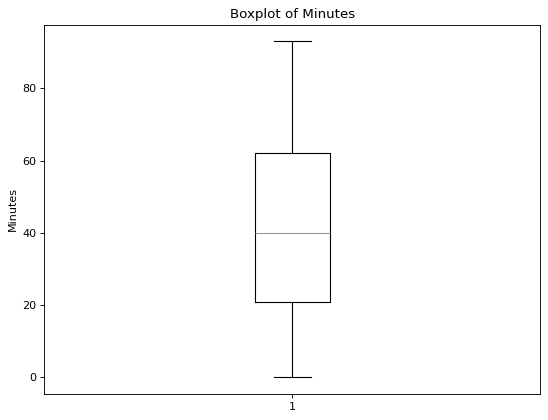

No outliers in Minutes
count    2614.000000
mean       41.444529
std        25.125764
min         0.000000
25%        21.000000
50%        40.000000
75%        62.000000
max        93.000000
Name: minute, dtype: float64


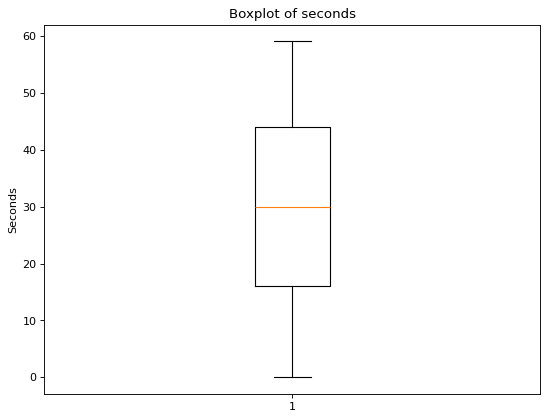

count    2614.000000
mean       29.761285
std        16.622057
min         0.000000
25%        16.000000
50%        30.000000
75%        44.000000
max        59.000000
Name: second, dtype: float64

No outliers in seconds


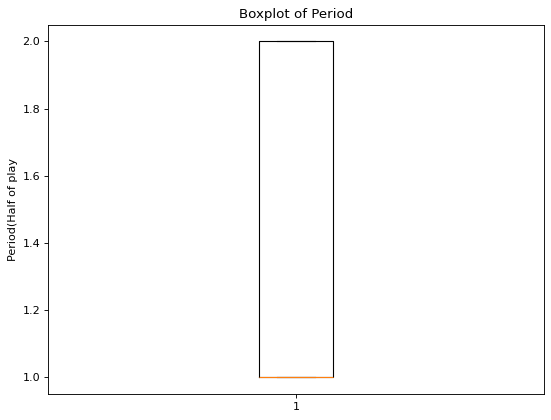

count    2614.000000
mean        1.385998
std         0.486923
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: period, dtype: float64

No outliers in period


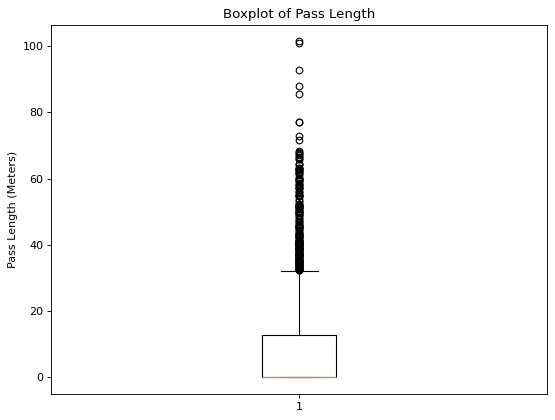

count    2614.000000
mean        8.192196
std        14.621349
min         0.000000
25%         0.000000
50%         0.000000
75%        12.800000
max       101.400000
Name: pass_length, dtype: float64

 Pass length has outliers past 35 meters but they are going to be kept as they are statistically possible


In [1813]:
#Checking numerical values for outliers 
      
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.minute)
plt.title("Boxplot of Minutes")
plt.ylabel("Minutes")
plt.show()
print("No outliers in Minutes")

print(data.minute.describe())
#decide to keep these values as look reasonable



figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.second)
plt.title("Boxplot of seconds")
plt.ylabel("Seconds")
plt.show()
print(data.second.describe())
print("\nNo outliers in seconds")


figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.period)
plt.title("Boxplot of Period")
plt.ylabel("Period(Half of play")
plt.show()
print(data.period.describe())
print("\nNo outliers in period")

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.pass_length)
plt.title("Boxplot of Pass Length")
plt.ylabel("Pass Length (Meters)") 
plt.show()
print(data.pass_length.describe())
print("\n Pass length has outliers past 35 meters but they are going to be kept as they are statistically possible")


#data.to_csv('data.csv', index=False)  # save as csv file
      

# 4 - Data Exploration:

## Univaraite Analysis

### Categorical 

In [1814]:
# Univariate for categorical variables such as duel outcome, duel type, pass outcome, shot body part, shot first time, shot outcome, shot technique, team
print(data.duel_outcome.unique())
print(data.duel_type.unique())
print(data.pass_outcome.unique())
print(data.shot_body_part.unique())
print(data.shot_first_time.unique())
print(data.shot_outcome.unique())
print(data.shot_technique.unique())
print(data.team.unique())

['N/A' 'Lost' 'Success In Play' 'Lost Out' 'Won' 'Lost In Play']
['N/A' 'Aerial Lost' 'Tackle']
['N/A' 'Complete' 'Out' 'Incomplete' 'Unknown' 'Pass Offside'
 'Injury Clearance']
['N/A' 'Head' 'Right Foot' 'Left Foot']
['N/A' 'False' 'True']
['N/A' 'Off T' 'Saved' 'Blocked' 'Goal' 'Post' 'Wayward']
['N/A' 'Normal' 'Half Volley' 'Volley']
['Levante UD' 'Eibar']


#### Duel Outcome

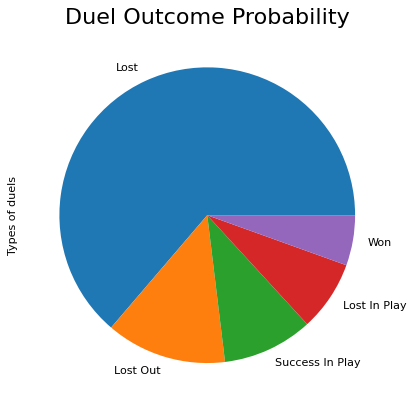

Around 62% of duels are lost while approximately 10% are won in play and 5% are only won


In [1815]:
#________________________________________Duel Outcome_______________________________________________________

#Filtering the N/A out for dueling outcome
filtered_DuelOutcome = data[data['duel_outcome'] != 'N/A']

#Using a pie chart to explore duel outcome data
#First calculate the percentage of each Duel outcome .
figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
filtered_DuelOutcome2 = filtered_DuelOutcome['duel_outcome'].value_counts(normalize=True)
filtered_DuelOutcome2.plot.pie()
plt.title("Duel Outcome Probability", size=20)
plt.ylabel("Types of duels")
plt.show()
print("Around 62% of duels are lost while approximately 10% are won in play and 5% are only won") 



#### Duel Type

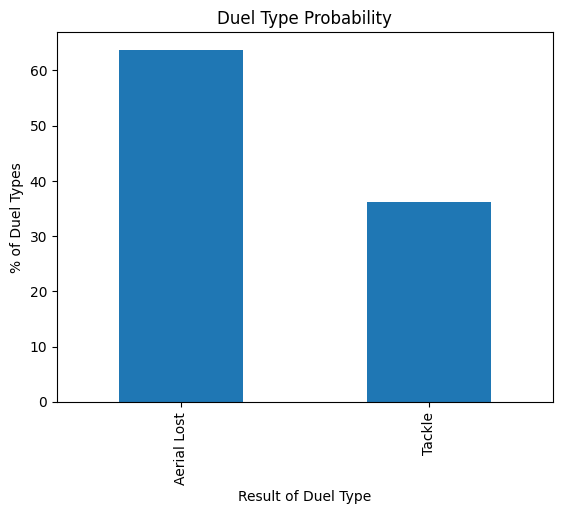

Approximately 2/3 of duels are aerial duels and the other 1/3 are ground duels


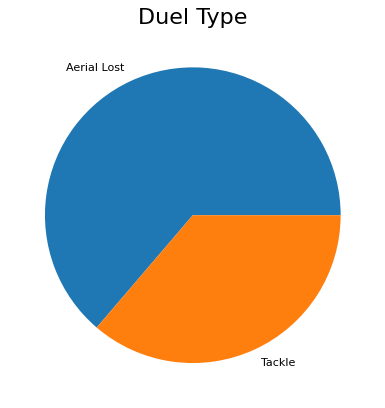

There is a around a 66% chance of duel being an aerial 


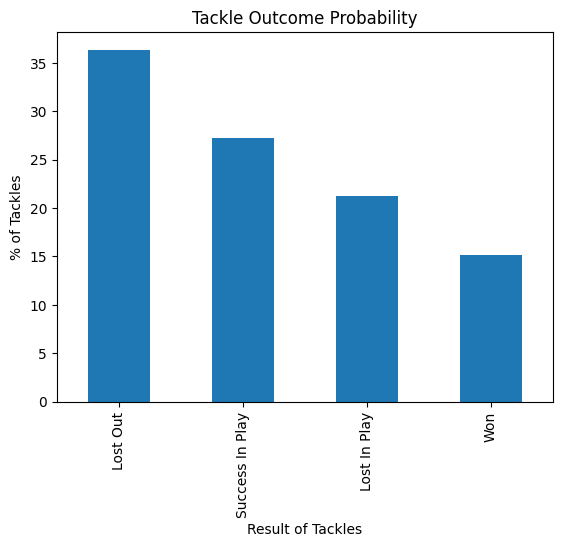

Tackles have approximately a 40% success rate and a 60% failure rate


In [1816]:
#________________________________________Duel Type_______________________________________________________

#Filtering the N/A out for dueling type
filtered_DuelType = data[data['duel_type'] != 'N/A']
# Let's calculate the percentage of each duel type probability.
duelType_percentage = filtered_DuelType['duel_type'].value_counts(normalize=True)*100
duelType_percentage.plot.bar()
plt.title("Duel Type Probability")
plt.xlabel("Result of Duel Type")
plt.ylabel("% of Duel Types")
plt.show() #Show the plot
print("Approximately 2/3 of duels are aerial duels and the other 1/3 are ground duels") 

#OR maybe use a pie chart to explore the education data 
#First calculate the percentage of each education category.
figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
filtered_DuelType1 = filtered_DuelType['duel_type'].value_counts(normalize=True)
filtered_DuelType1.plot.pie()
plt.title("Duel Type", size=20)
plt.ylabel("")
plt.show()
print("There is a around a 66% chance of duel being an aerial ") 

#Filtering the N/A out for dueling outcome and have to be a tackle
filtered_DuelOutcome = data[(data['duel_outcome'] != 'N/A') & (data['duel_type'] == 'Tackle')]
# Calculate the percentage of each duel outcome probability.
duel_percentage = filtered_DuelOutcome['duel_outcome'].value_counts(normalize=True)*100
duel_percentage.plot.bar()
plt.title("Tackle Outcome Probability")
plt.xlabel("Result of Tackles")
plt.ylabel("% of Tackles")
plt.show() #Show the plot
print("Tackles have approximately a 40% success rate and a 60% failure rate") 




#### Pass outcome

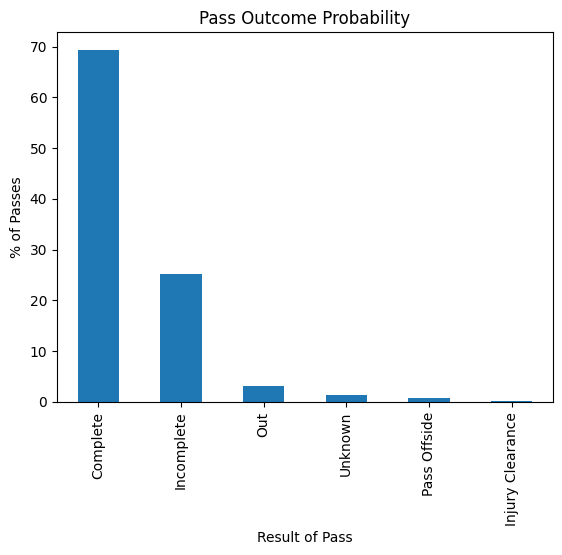

Nearly 70% of attempted passes are completed while the other 30% make up for unsuccessful passes and passes that are intercepted


In [1817]:
#________________________________________Pass Outcome_______________________________________________________

#Filtering the N/A out for pass outcome
filtered_PassOutcome = data[data['pass_outcome'] != 'N/A']

# Calculate the percentage of each pass outcome probability.
passOutcome_percentage = filtered_PassOutcome['pass_outcome'].value_counts(normalize=True)*100
passOutcome_percentage.plot.bar()
plt.title("Pass Outcome Probability")
plt.xlabel("Result of Pass")
plt.ylabel("% of Passes")
plt.show() #Show the plot
print("Nearly 70% of attempted passes are completed while the other 30% make up for unsuccessful passes and passes that are intercepted") 



#### Shot body part

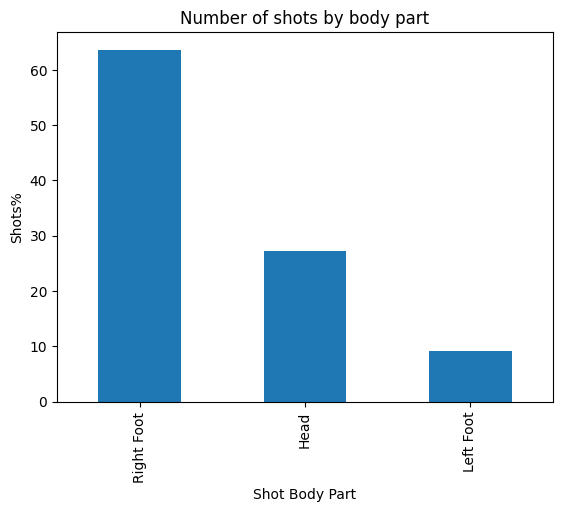

Just over 60% of shots are taken with their right foot , just over 25% are headers and the rest are taken with their left foot


In [1818]:
#________________________________________Shot body part_______________________________________________________

#Filtering the N/A out for shot body part
filtered_Shot_Body_Part = data[data['shot_body_part'] != 'N/A']

# Calculate the percentage of each shot body part
shot_Body_Part_Percentage = filtered_Shot_Body_Part['shot_body_part'].value_counts(normalize=True)*100
shot_Body_Part_Percentage.plot.bar()
plt.title("Number of shots by body part")
plt.xlabel("Shot Body Part")
plt.ylabel("Shots%")
plt.show() #Show the plot
print("Just over 60% of shots are taken with their right foot , just over 25% are headers and the rest are taken with their left foot") 


#### Shot first time

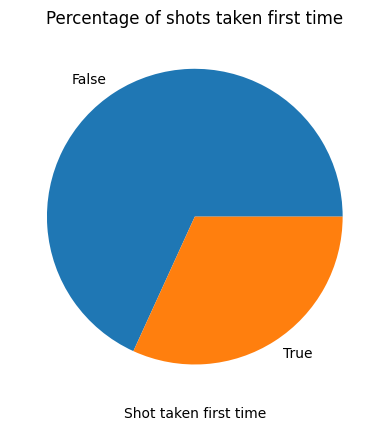

Approximately a little more than 30% of shots taken are done so first time


In [1819]:
#________________________________________Shot first time_______________________________________________________

#Filtering the N/A out for shooting first time outcome
filtered_Shot_firstime = data[data['shot_first_time'] != 'N/A']

# Calculate the total of shots being taken first time.
shot_firstTime_Percentage = filtered_Shot_firstime['shot_first_time'].value_counts(normalize=True)*100
shot_firstTime_Percentage.plot.pie()
plt.title("Percentage of shots taken first time")
plt.xlabel("Shot taken first time")
plt.ylabel("")
plt.show() #Show the plot
print("Approximately a little more than 30% of shots taken are done so first time") 

#### Shot outcome


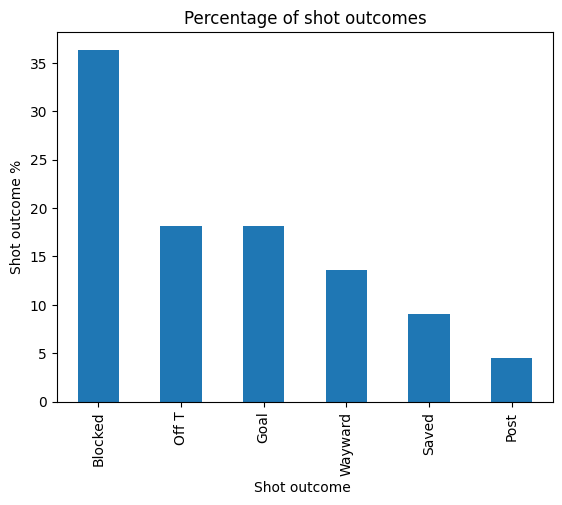

From all shots taken approximately 35% are on target, 30% are off target and 35% are blocked


In [1820]:
#________________________________________Shot outcome_______________________________________________________

#Filtering the N/A out for Shot outcome  outcome
filtered_Shot_outcome = data[data['shot_outcome'] != 'N/A']

# Calculate the percentage of each shot outcome by type
shot_outcome_Percentage = filtered_Shot_outcome['shot_outcome'].value_counts(normalize=True)*100
shot_outcome_Percentage.plot.bar()
plt.title("Percentage of shot outcomes")
plt.xlabel("Shot outcome ")
plt.ylabel("Shot outcome %")
plt.show() #Show the plot
print("From all shots taken approximately 35% are on target, 30% are off target and 35% are blocked") 

#### Shot technique

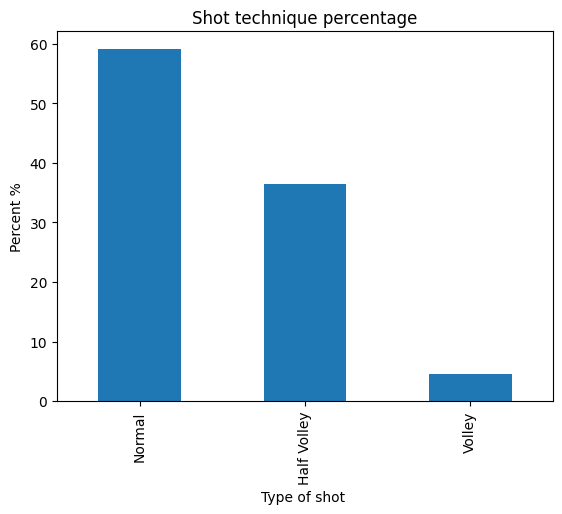

Regular shots made up for just under 60% of all shots taken in the game while different types of volleys made up the other 40%


In [1821]:
#________________________________________Shot technique_______________________________________________________

#Filtering the N/A out for Shot technique
filtered_Shot_technique = data[data['shot_technique'] != 'N/A']

# Calculate the percentage of each shot technique by type
shot_technique_Percentage = filtered_Shot_technique['shot_technique'].value_counts(normalize=True)*100
shot_technique_Percentage.plot.bar()
plt.title("Shot technique percentage")
plt.xlabel("Type of shot ")
plt.ylabel("Percent %")
plt.show() #Show the plot
print("Regular shots made up for just under 60% of all shots taken in the game while different types of volleys made up the other 40%") 

#### Team

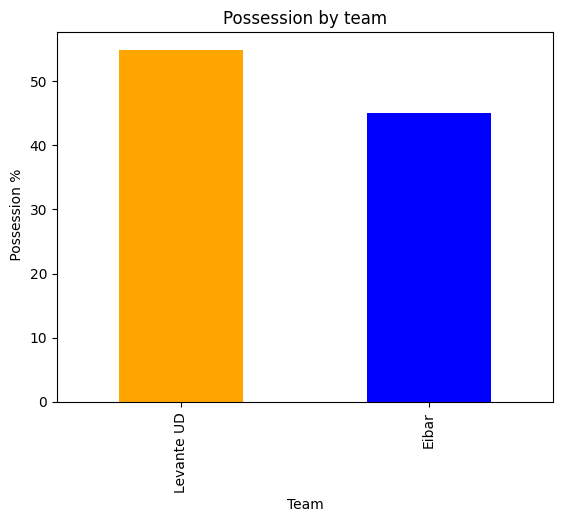

Levante had approximately 55% of the possession during the game while Eibar had 45%


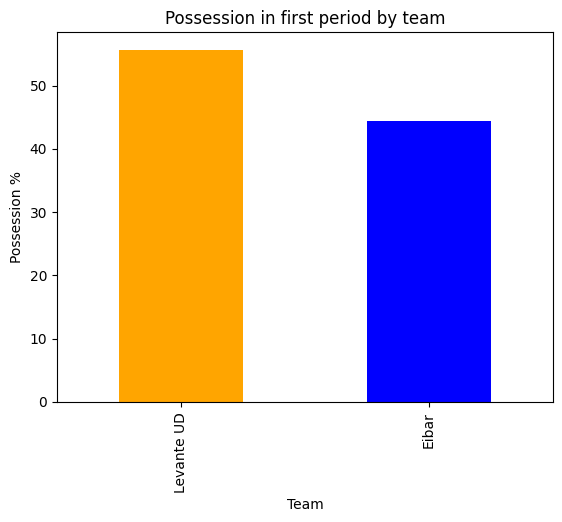

Levante had approximately 55% of the possession thought the game while Eibar had 45% in the first period


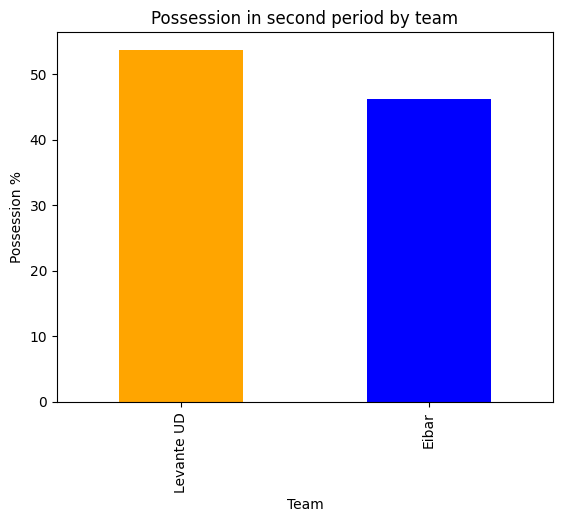

Levante had almost 60% of the possession thought the game while Eibar had 40% in the second period


In [1822]:
#________________________________________Shot technique_______________________________________________________

# Calculate the total time a team had possession of the ball
team_count = data['team'].value_counts(normalize=True)*100
team_count.plot.bar(color =['orange','blue'])
plt.title("Possession by team")
plt.xlabel("Team")
plt.ylabel(" Possession %")
plt.show() #Show the plot
print("Levante had approximately 55% of the possession during the game while Eibar had 45%") 


#Filtering the team by first period
filtered_team_period = data[data['period'] == 1]
# Calculate the percentage of each duel outcome probability.
team_possesion_1period = filtered_team_period['team'].value_counts(normalize=True)*100
team_possesion_1period.plot.bar(color =['orange','blue'])
plt.title("Possession in first period by team")
plt.xlabel("Team")
plt.ylabel("Possession %")
plt.show() #Show the plot
print("Levante had approximately 55% of the possession thought the game while Eibar had 45% in the first period") 


#Filtering the team by second period
filtered_team_period = data[data['period'] == 2]
# Calculate the percentage of each duel outcome probability.
team_possesion_2period = filtered_team_period['team'].value_counts(normalize=True)*100
team_possesion_2period.plot.bar(color =['orange','blue'])
plt.title("Possession in second period by team")
plt.xlabel("Team")
plt.ylabel("Possession %")
plt.show() #Show the plot
print("Levante had almost 60% of the possession thought the game while Eibar had 40% in the second period") 

### Numerical Variables

In [1823]:
summaryNumerical = data.describe()
print(summaryNumerical)



            minute  pass_length       period       second
count  2614.000000  2614.000000  2614.000000  2614.000000
mean     41.444529     8.192196     1.385998    29.761285
std      25.125764    14.621349     0.486923    16.622057
min       0.000000     0.000000     1.000000     0.000000
25%      21.000000     0.000000     1.000000    16.000000
50%      40.000000     0.000000     1.000000    30.000000
75%      62.000000    12.800000     2.000000    44.000000
max      93.000000   101.400000     2.000000    59.000000


#### Minute

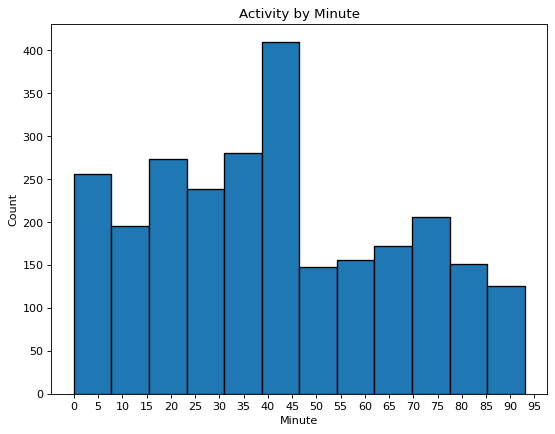

The last 10 minutes of the first half had the most activity
All other time periods where relatively the same except for the first 10 minutes of the second half which had the least activity

count    2614.000000
mean       41.444529
std        25.125764
min         0.000000
25%        21.000000
50%        40.000000
75%        62.000000
max        93.000000
Name: minute, dtype: float64


In [1824]:
#________________________________________Minute_______________________________________________________

# styling of minute diagram
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(x=data.minute,edgecolor='black', linewidth=1.2, bins=12)

# set the ticks and labels to display as the x axis
tickvalues = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
ticklabels = ["0","5","10","15","20","25","30","35","40","45","50","55","60","65","70","75","80","85","90","95"]

plt.xticks(tickvalues,ticklabels)
plt.title("Activity by Minute")
plt.ylabel("Count")
plt.xlabel("Minute")
plt.show()

print("The last 10 minutes of the first half had the most activity")
print("All other time periods where relatively the same except for the first 10 minutes of the second half which had the least activity\n")

# describe the data showing min, max, mean, std, count, 25%, 50%, 75%
print(data.describe().minute)


#### Second

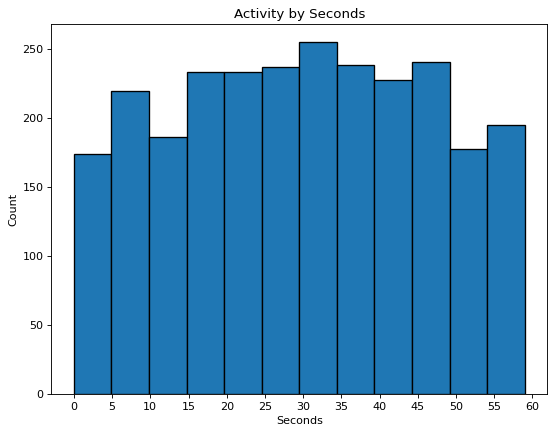

The majorit of activity happen equal throught the minute  with the exception 
10 to 15 being the lowest And 20 to 25 being the highest

count    2614.000000
mean       29.761285
std        16.622057
min         0.000000
25%        16.000000
50%        30.000000
75%        44.000000
max        59.000000
Name: second, dtype: float64


In [1825]:
#________________________________________Second _______________________________________________________

# styling of second diagram
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(x=data.second,edgecolor='black', linewidth=1.2, bins=12)

# set the ticks and labels to display as the x axis
tickvalues = [0,5,10,15,20,25,30,35,40,45,50,55,60]
ticklabels = ["0","5","10","15","20","25","30","35","40","45","50","55","60"]

plt.xticks(tickvalues,ticklabels)
plt.title("Activity by Seconds")
plt.ylabel("Count")
plt.xlabel("Seconds")
plt.show()

print("The majorit of activity happen equal throught the minute  with the exception \n10 to 15 being the lowest And 20 to 25 being the highest\n")

# describe the data 
print(data.describe().second)

#### Pass Length

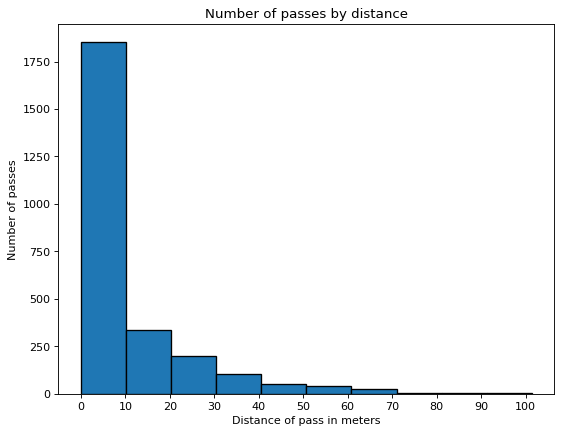

Most passes are made in the 0 - 20 meters

count    2614.000000
mean        8.192196
std        14.621349
min         0.000000
25%         0.000000
50%         0.000000
75%        12.800000
max       101.400000
Name: pass_length, dtype: float64


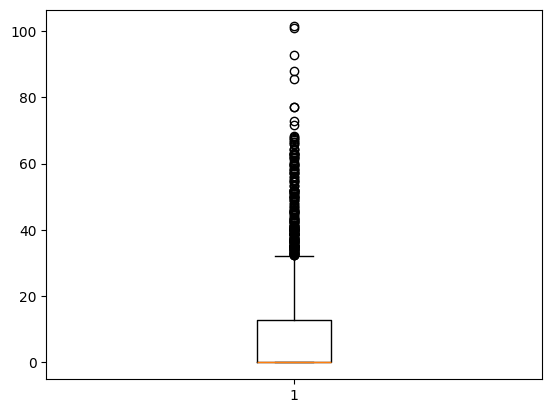

The majority of passes are made 0 to 60 meters



In [1826]:
#________________________________________Pass Length _______________________________________________________

# styling of pass length diagram
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(x=data.pass_length,edgecolor='black', linewidth=1.2)

# set the ticks and labels to display as the x axis
tickvalues = [0,10,20,30,40,50,60,70,80,90,100]
ticklabels = ["0","10","20","30","40","50","60","70","80","90","100"]

plt.xticks(tickvalues,ticklabels)
plt.title("Number of passes by distance")
plt.ylabel("Number of passes")
plt.xlabel("Distance of pass in meters")
plt.show()
print("Most passes are made in the 0 - 20 meters\n")

# describe the data of pass length
print(data.describe().pass_length)

# Boxplot for pass length
plt.boxplot(x=data.pass_length)
plt.show()
print("The majority of passes are made 0 to 60 meters\n")


#### Period

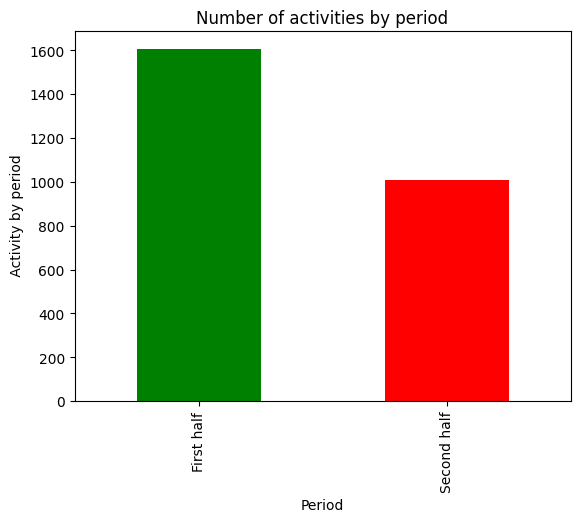

The number of activities in both periods is almost identical

count    2614.000000
mean        1.385998
std         0.486923
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: period, dtype: float64


In [1827]:
#________________________________________Period_______________________________________________________
period_count = data['period'].value_counts()
period_count.plot.bar(color =['green','red'])
plt.title("Number of activities by period")

tickvalues = [0,1]
ticklabels = ["First half","Second half"]
plt.xticks(tickvalues,ticklabels)

plt.xlabel("Period")
plt.ylabel(" Activity by period")
plt.show() #Show the plot
print("The number of activities in both periods is almost identical\n") 


# describe the data showing min, max, mean, std, count, 25%, 50%, 75%
print(data.describe().period)

## Bivariate Analysis

### Numerical - Numerical

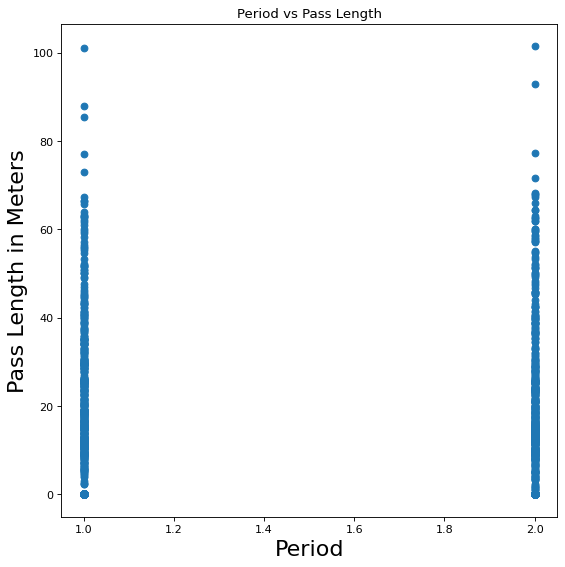

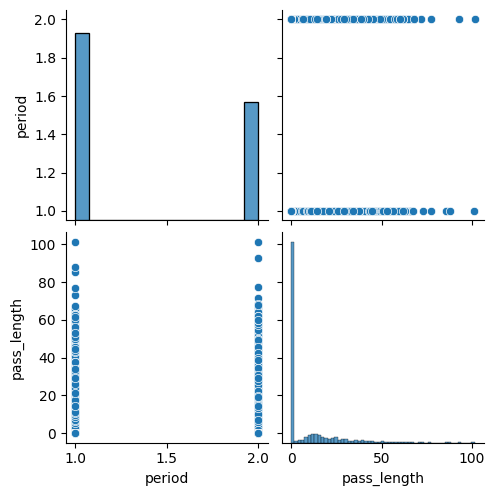

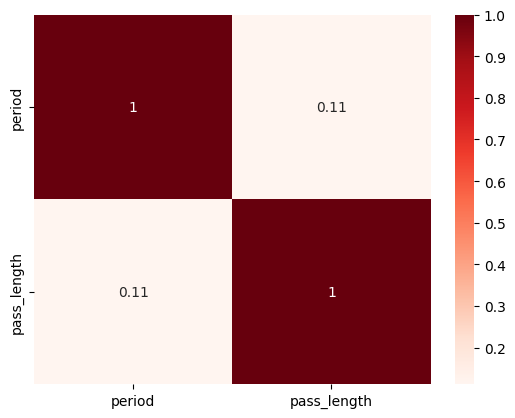

             pass_length   period
pass_length      1.00000  0.11242
period           0.11242  1.00000
There seems to be a very weak positive correlation between the period of play and the pass length


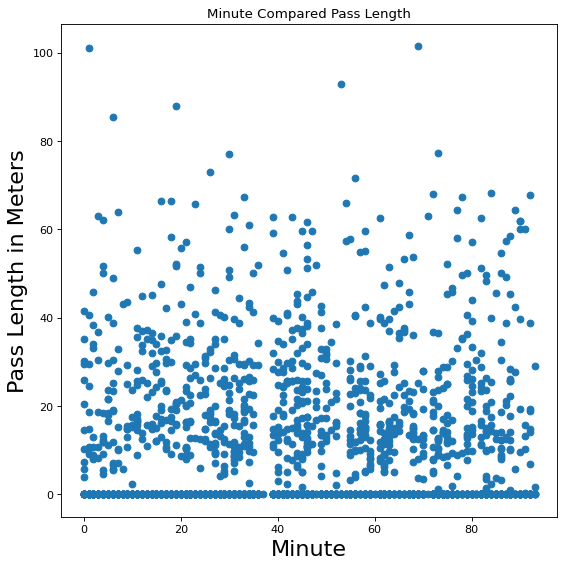

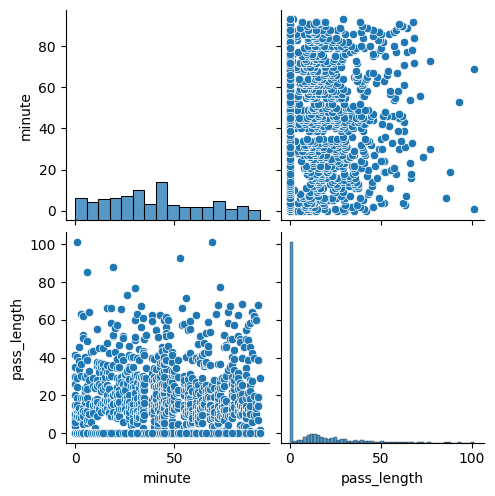

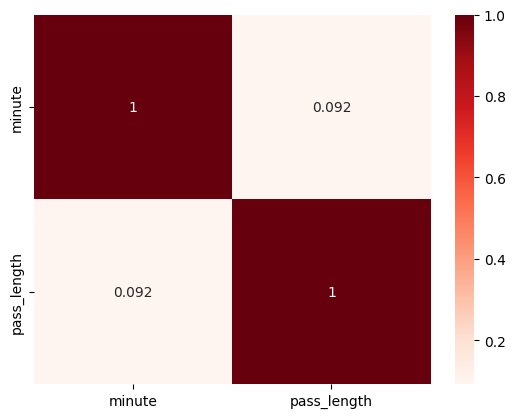

             pass_length  minute
pass_length       1.0000  0.0918
minute            0.0918  1.0000
There seems to be a very weak positive correlation between the minute of play and the pass length


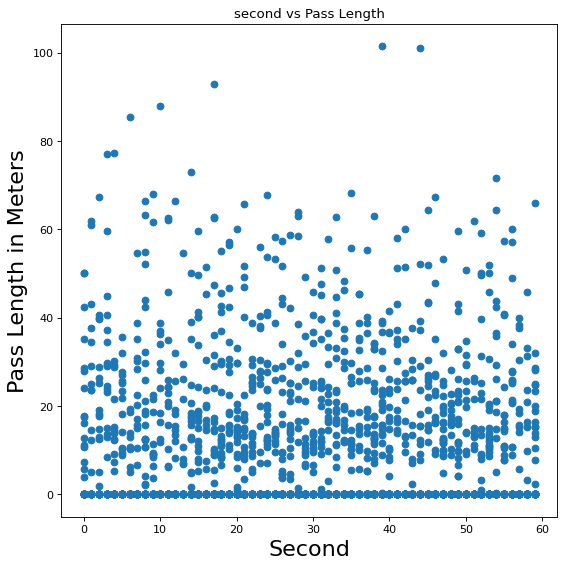

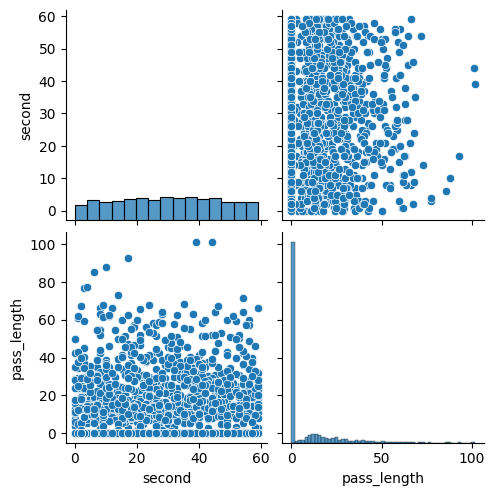

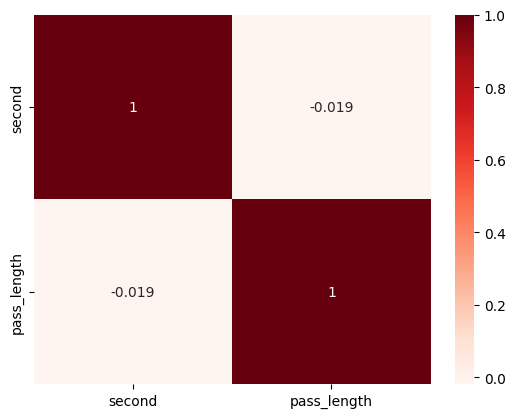

             pass_length   second
pass_length      1.00000 -0.01931
second          -0.01931  1.00000
There seems to be a very weak negative correlation between the period of play and seconds


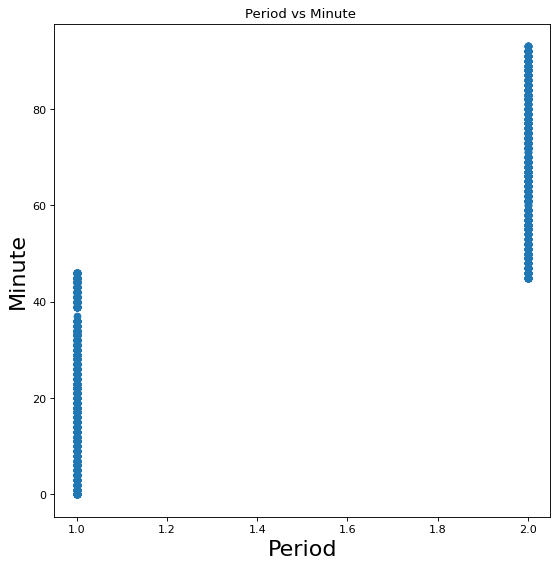

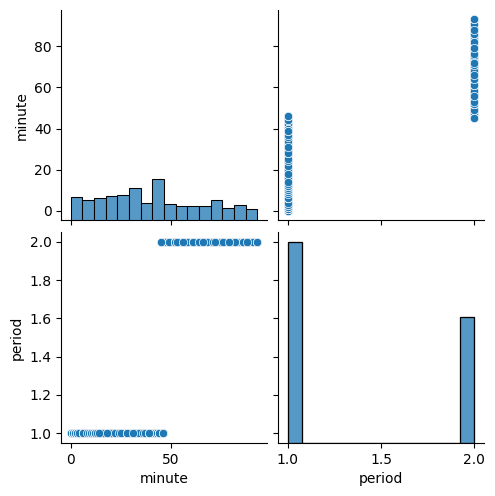

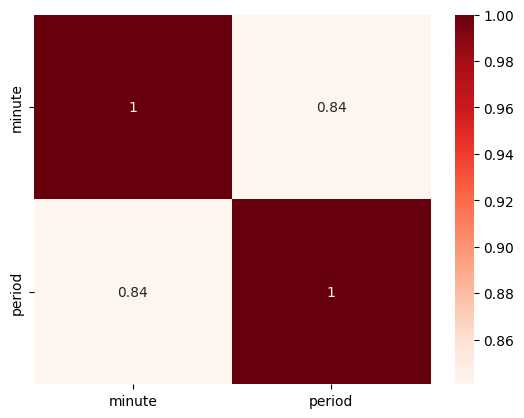

          minute    period
minute  1.000000  0.840723
period  0.840723  1.000000
There seems to be a strong positive correlation between the period of play and the minute


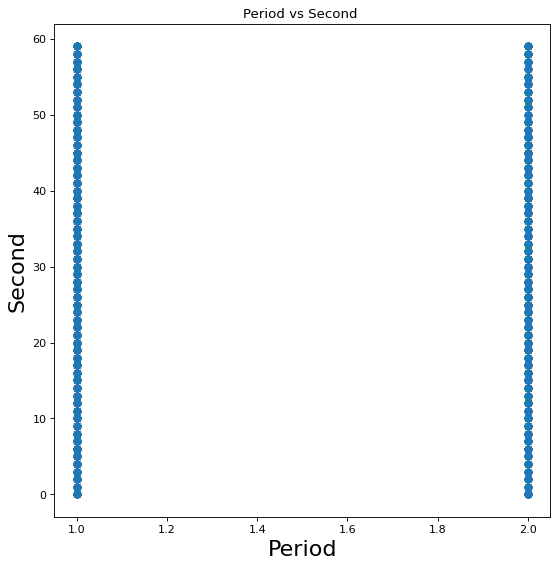

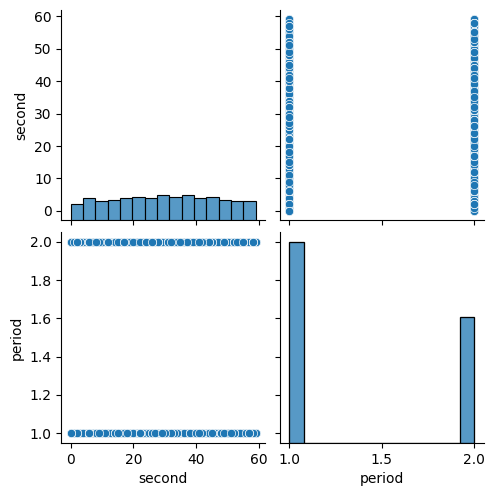

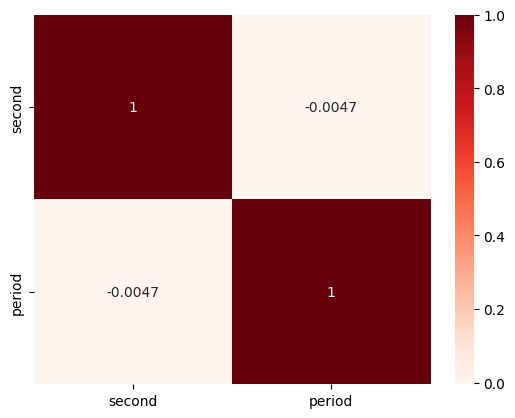

          second    period
second  1.000000 -0.004735
period -0.004735  1.000000
There seems to be almost no correlation between the seconds of play and  period played in


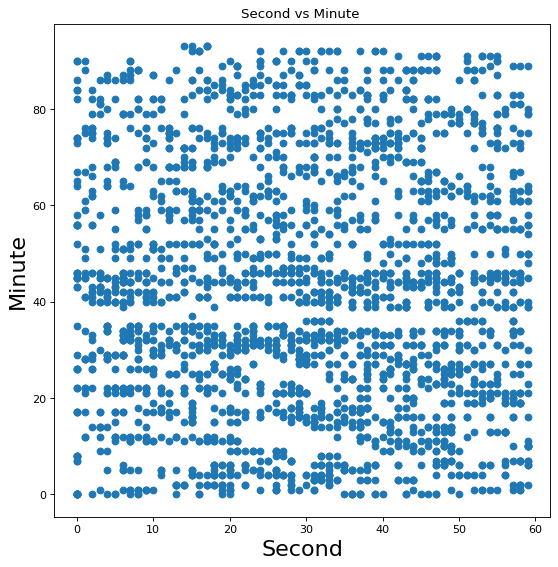

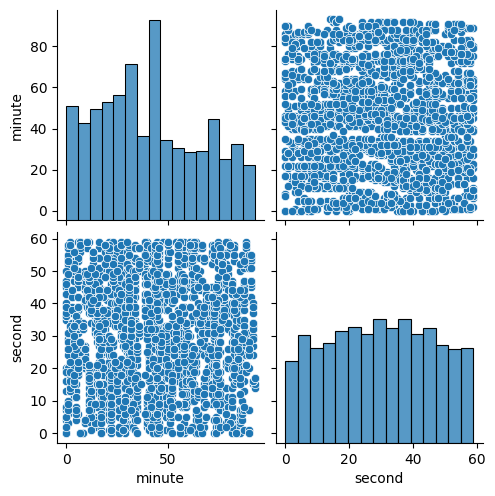

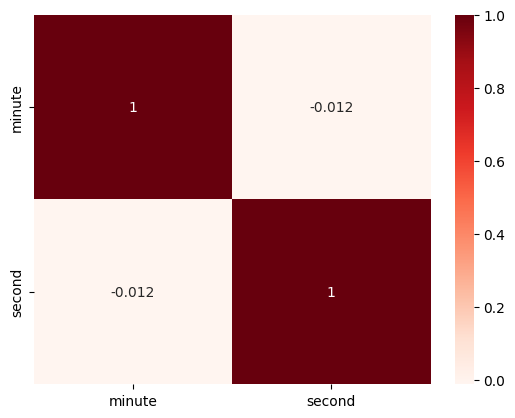

          minute    second
minute  1.000000 -0.011631
second -0.011631  1.000000
There seems to be only a very weak negative correlation between the minute of play and second of play 


In [1828]:
#________________________________________Pass Length / Period _______________________________________________________
# numeric analysis for two variables where both are numeric

#plot the scatter plot of Period and Pass Length variable in data
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data.period,data.pass_length)
plt.title("Period vs Pass Length")
plt.xlabel("Period", size=20)
plt.ylabel("Pass Length in Meters", size=20)
plt.show()

# Creating a matrix using period and pass_length as rows and columns
sns.pairplot(data = data, vars=['period','pass_length'])
plt.show()


#plot the correlation matrix of period and pass_length in data dataframe.
sns.heatmap(data[['period','pass_length']].corr(), annot=True, cmap = 'Reds')
plt.show()

#Calculate correlation
print(data[['pass_length','period']].corr())
print("There seems to be a very weak positive correlation between the period of play and the pass length")
#________________________________________Pass Length / minute _______________________________________________________

#plot the scatter plot of pass length and minute variable in data
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data.minute,data.pass_length)
plt.title("Minute Compared Pass Length")
plt.xlabel("Minute", size=20)
plt.ylabel("Pass Length in Meters", size=20)
plt.show()

# Creating a matrix using period and minute as rows and columns
sns.pairplot(data = data, vars=['minute','pass_length'])
plt.show()


#plot the correlation matrix of minute and pass length in data dataframe.
sns.heatmap(data[['minute','pass_length']].corr(), annot=True, cmap = 'Reds')
plt.show()

#Calculate correlation
print(data[['pass_length','minute']].corr())
print("There seems to be a very weak positive correlation between the minute of play and the pass length")

#________________________________________Pass Length / second _______________________________________________________

#plot the scatter plot of Second and pass length variable in data
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data.second,data.pass_length)
plt.title("second vs Pass Length")
plt.xlabel("Second", size=20)
plt.ylabel("Pass Length in Meters", size=20)
plt.show()

# Creating a matrix using second, pass_length as rows and columns
sns.pairplot(data = data, vars=['second','pass_length'])
plt.show()

#plot the correlation matrix of second and pass length in data dataframe.
sns.heatmap(data[['second','pass_length']].corr(), annot=True, cmap = 'Reds')
plt.show()

#Calculate correlation
print(data[['pass_length','second']].corr())
print("There seems to be a very weak negative correlation between the period of play and seconds")
#________________________________________Period / minute _______________________________________________________

#plot the scatter plot of period and minute variable in data
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data.period,data.minute)
plt.title("Period vs Minute ")
plt.xlabel("Period", size=20)
plt.ylabel("Minute", size=20)
plt.show()

# Creating a matrix using period and minute as rows and columns
sns.pairplot(data = data, vars=['minute','period'])
plt.show()


#plot the correlation matrix of minute and balance in data dataframe.
sns.heatmap(data[['minute','period']].corr(), annot=True, cmap = 'Reds')
plt.show()

#Calculate correlation
print(data[['minute','period']].corr())
print("There seems to be a strong positive correlation between the period of play and the minute")
#________________________________________Period / second _______________________________________________________

#plot the scatter plot of period and second variable in data
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data.period,data.second)
plt.title("Period vs Second ")
plt.xlabel("Period", size=20)
plt.ylabel("Second", size=20)
plt.show()

#Summary Statement - There is no indication that those who are older will have higher balances 

# Creating a matrix using second and period as rows and columns
sns.pairplot(data = data, vars=['second','period'])
plt.show()


#plot the correlation matrix of second and period in data dataframe.
sns.heatmap(data[['second','period']].corr(), annot=True, cmap = 'Reds')
plt.show()

#Calculate correlation
print(data[['second','period']].corr())
print("There seems to be almost no correlation between the seconds of play and  period played in")


#________________________________________Minute / second _______________________________________________________

#plot the scatter plot of minute and second variable in data
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data.second,data.minute)
plt.title("Second vs Minute ")
plt.xlabel("Second", size=20)
plt.ylabel("Minute", size=20)
plt.show()

# Creating a matrix using minute and second as rows and columns
sns.pairplot(data = data, vars=['minute','second'])
plt.show()


#plot the correlation matrix of minute and second in data dataframe.
sns.heatmap(data[['minute','second']].corr(), annot=True, cmap = 'Reds')
plt.show()

#Calculate correlation
print(data[['minute','second']].corr())
print("There seems to be only a very weak negative correlation between the minute of play and second of play ")


### Numerical - Categorical

#### Shot Technique

Mean Shot Technique by Minute
shot_technique
Half Volley    43.000000
Normal         46.076923
Volley         34.000000
Name: minute, dtype: float64

Median Shot Technique by Minute:
shot_technique
Half Volley    41.5
Normal         52.0
Volley         34.0
Name: minute, dtype: float64


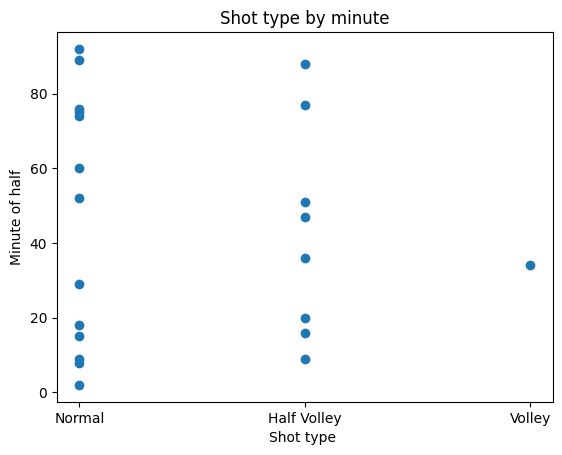

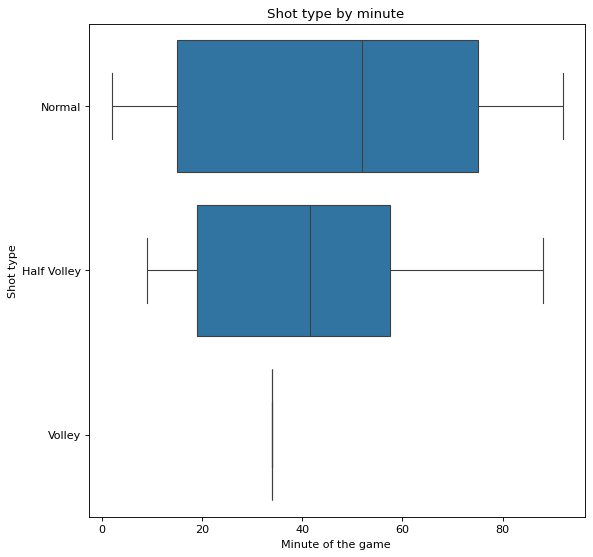

normal shots are taken most often, half volleys get taken almost as much as regular shots while volleys are very rare in the game

Mean Shot technique by Period:
shot_technique
Half Volley    1.500000
Normal         1.538462
Volley         1.000000
Name: period, dtype: float64

Median Shot technique by Period:
shot_technique
Half Volley    1.5
Normal         2.0
Volley         1.0
Name: period, dtype: float64


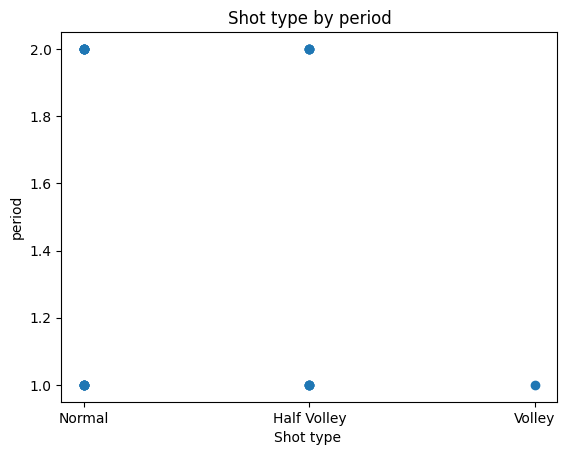

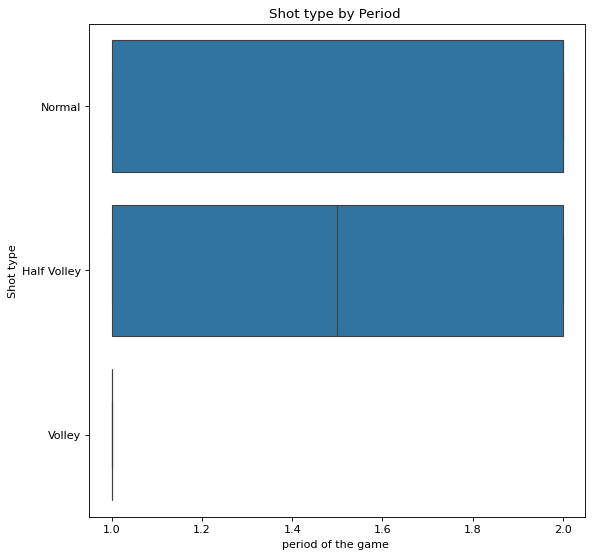

Shots taken are almost identical in both periods

Mean Shot Technique by Second:
shot_technique
Half Volley    34.125000
Normal         33.153846
Volley         57.000000
Name: second, dtype: float64

Median Shot Technique by Second:
shot_technique
Half Volley    35.0
Normal         39.0
Volley         57.0
Name: second, dtype: float64


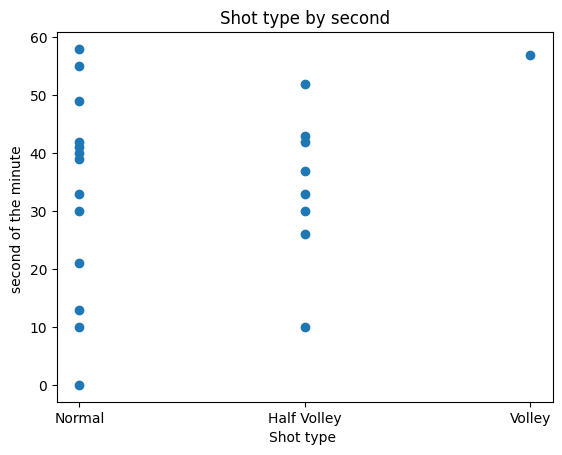

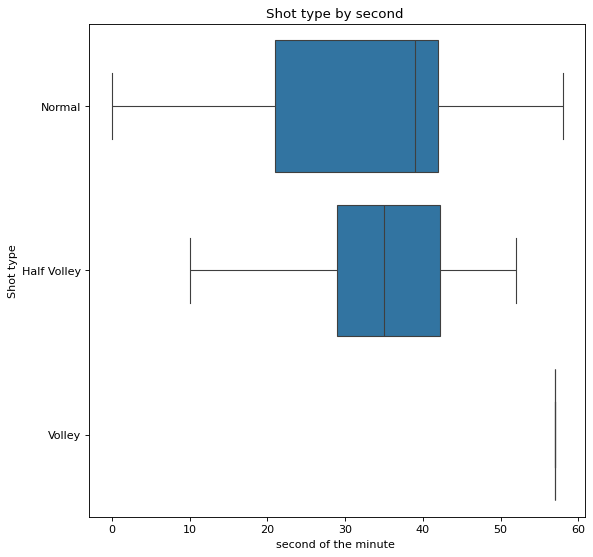

There is a higher frequency of shots taken in the second half of the minute

Mean Shot Technique by Pass length :
shot_technique
Half Volley    0.0
Normal         0.0
Volley         0.0
Name: pass_length, dtype: float64

Median Shot Technique by pass length :
shot_technique
Half Volley    0.0
Normal         0.0
Volley         0.0
Name: pass_length, dtype: float64


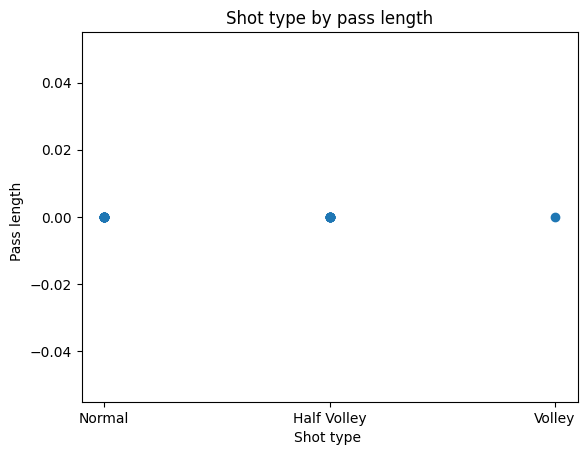

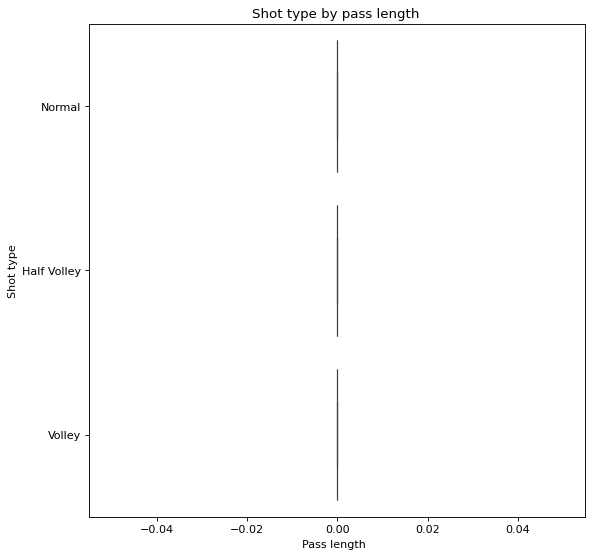

There is no correlation between the pass length and the type of shot taken



In [1829]:
#________________________________________shot technique by minute _______________________________________________________

# difficulty getting numerical and categorical to work as it goes out of bounds

#We analyze them mainly using mean, median, and box plots.
#Investigate shot technique and minute columns from our dataset.

filtered_Shot_technique = data[data['shot_technique'] != 'N/A']

#groupby the response to find the mean and median of the shot technique with minutes separately.
print("Mean Shot Technique by Minute")
mean_shot_by_minute=filtered_Shot_technique.groupby('shot_technique')['minute'].mean()
print(mean_shot_by_minute)

print("\nMedian Shot Technique by Minute:")
print(filtered_Shot_technique.groupby('shot_technique')['minute'].median())

#plot the boxplot of shot technique by minute
plt.scatter(filtered_Shot_technique['shot_technique'],filtered_Shot_technique['minute'])
plt.title("Shot type by minute")
plt.xlabel("Shot type ")
plt.ylabel("Minute of half")
plt.show()



# display the boxplot of shot technique by minute
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_Shot_technique['minute'], y=filtered_Shot_technique['shot_technique'])
plt.title("Shot type by minute ")
plt.xlabel("Minute of the game ")
plt.ylabel("Shot type")
plt.show()
print("normal shots are taken most often, half volleys get taken almost as much as regular shots while volleys are very rare in the game\n")
 


#________________________________________shot technique by period _______________________________________________________

#groupby the response to find the mean and median of the shot technique with period separately.
print("Mean Shot technique by Period:")
mean_shot_by_period=filtered_Shot_technique.groupby('shot_technique')['period'].mean()
print(mean_shot_by_period)

print("\nMedian Shot technique by Period:")
print(filtered_Shot_technique.groupby('shot_technique')['period'].median())

#plot the boxplot of shot technique by period
plt.scatter(filtered_Shot_technique['shot_technique'],filtered_Shot_technique['period'])
plt.title("Shot type by period")
plt.xlabel("Shot type ")
plt.ylabel("period")
plt.show()


# display the boxplot of shot technique by period
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_Shot_technique['period'], y=filtered_Shot_technique['shot_technique'])
plt.title("Shot type by Period ")
plt.xlabel("period of the game ")
plt.ylabel("Shot type")
plt.show()
print("Shots taken are almost identical in both periods\n")


#________________________________________shot technique by second _______________________________________________________

 #Investigate shot technique and second columns from our dataset.

#groupby the response to find the mean and median of the shot technique with second separately.
print("Mean Shot Technique by Second:")
mean_shot_by_second=filtered_Shot_technique.groupby('shot_technique')['second'].mean()
print(mean_shot_by_second)

print("\nMedian Shot Technique by Second:")
print(filtered_Shot_technique.groupby('shot_technique')['second'].median())

#plot the boxplot of shot technique by second
plt.scatter(filtered_Shot_technique['shot_technique'],filtered_Shot_technique['second'])
plt.title("Shot type by second")
plt.xlabel("Shot type ")
plt.ylabel("second of the minute ")
plt.show()


# display the boxplot of shot technique by second
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_Shot_technique['second'], y=filtered_Shot_technique['shot_technique'])
plt.title("Shot type by second ")
plt.xlabel("second of the minute ")
plt.ylabel("Shot type")
plt.show()
print("There is a higher frequency of shots taken in the second half of the minute\n")

#________________________________________shot technique by pass length _______________________________________________________
 #Investigate shot technique and pass length  columns from our dataset.

#groupby the response to find the mean and median of the shot technique with pass length  separately.
print("Mean Shot Technique by Pass length :")
mean_shot_by_pass_length=filtered_Shot_technique.groupby('shot_technique')['pass_length'].mean()
print(mean_shot_by_pass_length)

print("\nMedian Shot Technique by pass length :")
print(filtered_Shot_technique.groupby('shot_technique')['pass_length'].median())

#plot the boxplot of shot technique by pass length
plt.scatter(filtered_Shot_technique['shot_technique'],filtered_Shot_technique['pass_length'])
plt.title("Shot type by pass length")
plt.xlabel("Shot type ")
plt.ylabel("Pass length  ")
plt.show()

# display the boxplot of shot technique by pass length
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_Shot_technique['pass_length'], y=filtered_Shot_technique['shot_technique'])
plt.title("Shot type by pass length ")
plt.xlabel("Pass length  ")
plt.ylabel("Shot type")
plt.show()
print("There is no correlation between the pass length and the type of shot taken\n")

#### Duel Outcome 

Mean duel outcome by minute:
duel_outcome
Lost               49.362069
Lost In Play       48.428571
Lost Out           46.750000
Success In Play    47.444444
Won                52.200000
Name: minute, dtype: float64

Median Duel outcome by minute:
duel_outcome
Lost               45.5
Lost In Play       41.0
Lost Out           45.5
Success In Play    44.0
Won                55.0
Name: minute, dtype: float64


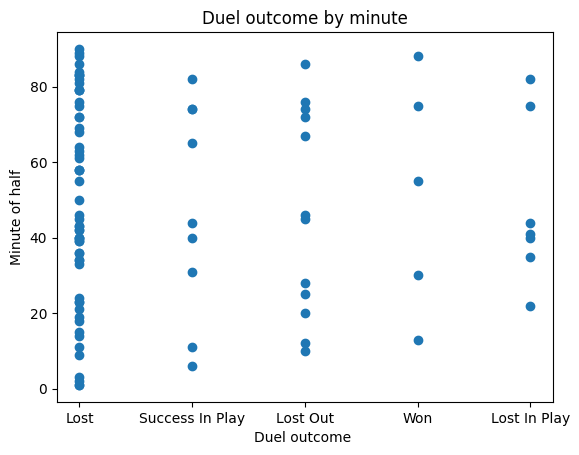

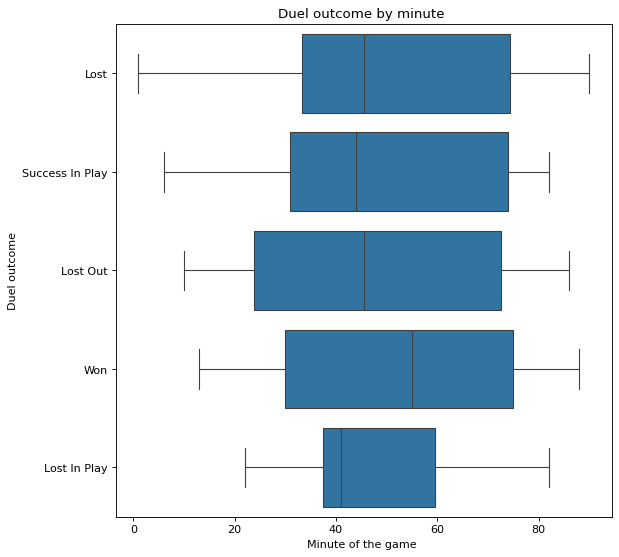

Duel outcomes are fairly evenly distributed throughout the minute
 with a slight increase in duels won in the second half of the game

Mean duel outcome by Period:
duel_outcome
Lost               1.500000
Lost In Play       1.285714
Lost Out           1.583333
Success In Play    1.444444
Won                1.600000
Name: period, dtype: float64

Median duel outcome by Period:
duel_outcome
Lost               1.5
Lost In Play       1.0
Lost Out           2.0
Success In Play    1.0
Won                2.0
Name: period, dtype: float64


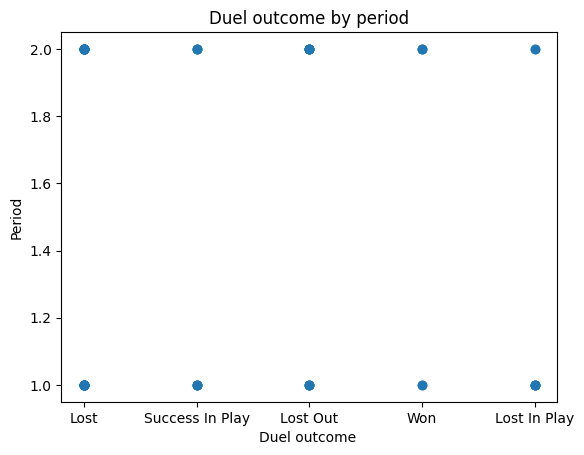

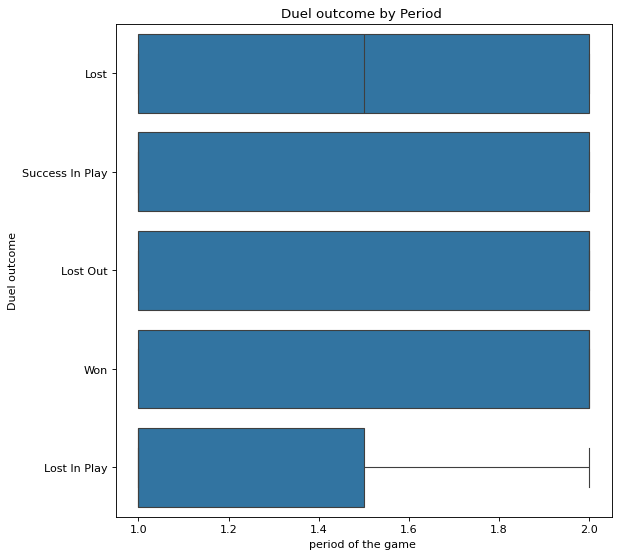

Duel outcome by period is almost identical in both periods but more duels are lost in the first half

Mean Duel outcome by second:
duel_outcome
Lost               27.500000
Lost In Play       26.285714
Lost Out           40.500000
Success In Play    36.000000
Won                30.600000
Name: second, dtype: float64

Median Duel outcome by second:
duel_outcome
Lost               26.0
Lost In Play       27.0
Lost Out           44.0
Success In Play    44.0
Won                22.0
Name: second, dtype: float64


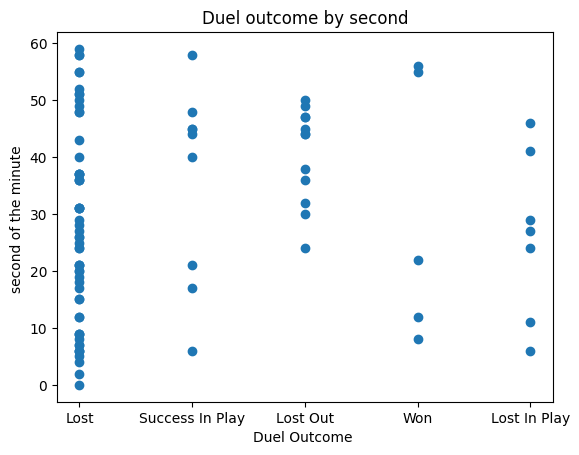

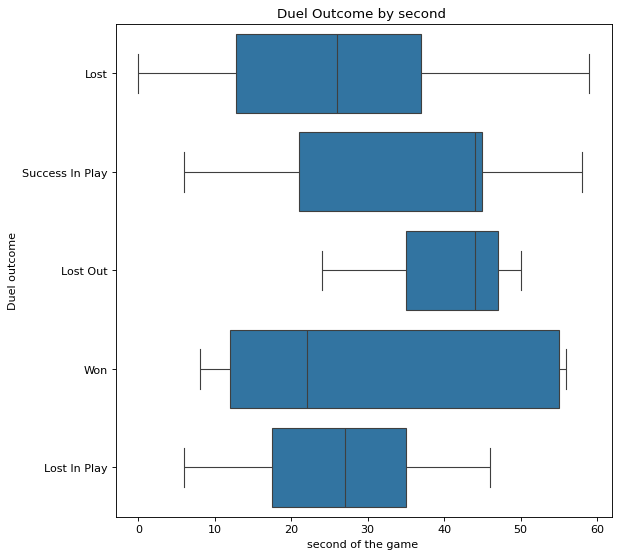

The average duel happens around the 15 second to 50 second mark . While lost out happens most frequently in the 35 to 50 second mark

Mean Duel outcome by Pass length :
duel_outcome
Lost               0.0
Lost In Play       0.0
Lost Out           0.0
Success In Play    0.0
Won                0.0
Name: pass_length, dtype: float64

Median Duel outcome by pass length :
duel_outcome
Lost               0.0
Lost In Play       0.0
Lost Out           0.0
Success In Play    0.0
Won                0.0
Name: pass_length, dtype: float64


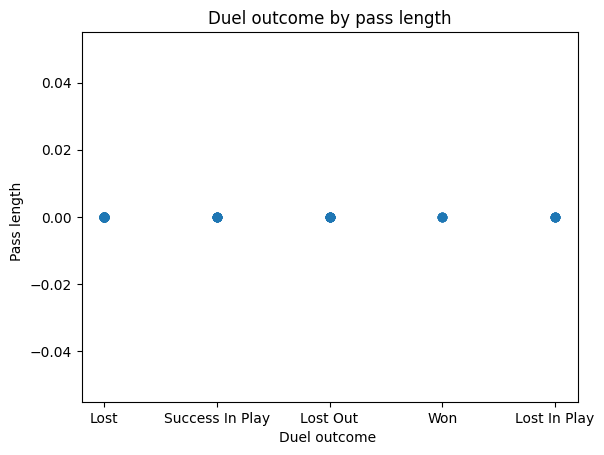

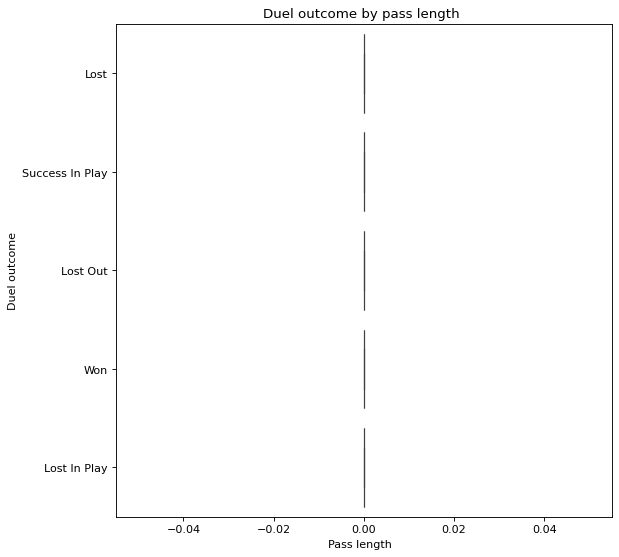

There is no correlation between the pass length and the duel outcome



In [1830]:
#________________________________________Duel outcome by minute _______________________________________________________
#Investigate duel outcome and minute columns from our dataset.

filtered_duel_outcome = data[data['duel_outcome'] != 'N/A']

#groupby the response to find the mean and median of the duel outcome with minutes separately.
print("Mean duel outcome by minute:")
mean_duel_outcome_minute=filtered_duel_outcome.groupby('duel_outcome')['minute'].mean()
print(mean_duel_outcome_minute)

print("\nMedian Duel outcome by minute:")
print(filtered_duel_outcome.groupby('duel_outcome')['minute'].median())

#plot the boxplot of duel outcome by minute
plt.scatter(filtered_duel_outcome['duel_outcome'],filtered_duel_outcome['minute'])
plt.title("Duel outcome by minute")
plt.xlabel("Duel outcome ")
plt.ylabel("Minute of half")
plt.show()



# display the boxplot of Duel outcome by minute
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_duel_outcome['minute'], y=filtered_duel_outcome['duel_outcome'])
plt.title("Duel outcome by minute ")
plt.xlabel("Minute of the game ")
plt.ylabel("Duel outcome")
plt.show()
print("Duel outcomes are fairly evenly distributed throughout the minute\n with a slight increase in duels won in the second half of the game\n")
 


#________________________________________duel outcome by period _______________________________________________________

#groupby the response to find the mean and median of the duel outcome with period separately.
print("Mean duel outcome by Period:")
mean_duel_outcome_period=filtered_duel_outcome.groupby('duel_outcome')['period'].mean()
print(mean_duel_outcome_period)

print("\nMedian duel outcome by Period:")
print(filtered_duel_outcome.groupby('duel_outcome')['period'].median())

#plot the boxplot of duel outcome by period
plt.scatter(filtered_duel_outcome['duel_outcome'],filtered_duel_outcome['period'])
plt.title("Duel outcome by period")
plt.xlabel("Duel outcome ")
plt.ylabel("Period")
plt.show()



# display the boxplot of duel outcome by period
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_duel_outcome['period'], y=filtered_duel_outcome['duel_outcome'])
plt.title("Duel outcome by Period ")
plt.xlabel("period of the game ")
plt.ylabel("Duel outcome")
plt.show()
print("Duel outcome by period is almost identical in both periods but more duels are lost in the first half\n")


#________________________________________duel outcome by second _______________________________________________________

 #Investigate duel outcome and second columns from our dataset.

#groupby the response to find the mean and median of the duel outcome and second separately.
print("Mean Duel outcome by second:")
mean_duel_outcome_second=filtered_duel_outcome.groupby('duel_outcome')['second'].mean()
print(mean_duel_outcome_second)

print("\nMedian Duel outcome by second:")
print(filtered_duel_outcome.groupby('duel_outcome')['second'].median())

#plot the boxplot of duel outcome by second
plt.scatter(filtered_duel_outcome['duel_outcome'],filtered_duel_outcome['second'])
plt.title("Duel outcome by second")
plt.xlabel("Duel Outcome ")
plt.ylabel("second of the minute ")
plt.show()



# display the boxplot of duel outcome by second
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_duel_outcome['second'], y=filtered_duel_outcome['duel_outcome'])
plt.title("Duel Outcome by second ")
plt.xlabel("second of the game ")
plt.ylabel("Duel outcome")
plt.show()
print("The average duel happens around the 15 second to 50 second mark . While lost out happens most frequently in the 35 to 50 second mark\n")

#________________________________________Duel outcome by pass length _______________________________________________________
 #Investigate Duel outcome and pass length  columns from our dataset.

#groupby the response to find the mean and median of the Duel outcome with pass length  separately.
print("Mean Duel outcome by Pass length :")
mean_duel_outcome_pass_length=filtered_duel_outcome.groupby('duel_outcome')['pass_length'].mean()
print(mean_duel_outcome_pass_length)

print("\nMedian Duel outcome by pass length :")
print(filtered_duel_outcome.groupby('duel_outcome')['pass_length'].median())

#plot the boxplot of Duel outcome by pass length
plt.scatter(filtered_duel_outcome['duel_outcome'],filtered_duel_outcome['pass_length'])
plt.title("Duel outcome by pass length")
plt.xlabel("Duel outcome ")
plt.ylabel("Pass length  ")
plt.show()


# display the boxplot of Duel outcome by pass length
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_duel_outcome['pass_length'], y=filtered_duel_outcome['duel_outcome'])
plt.title("Duel outcome by pass length ")
plt.xlabel("Pass length  ")
plt.ylabel("Duel outcome")
plt.show()
print("There is no correlation between the pass length and the duel outcome\n")
   
   
   

####   Team

Mean Team by minute:
team
Eibar         41.664122
Levante UD    41.264111
Name: minute, dtype: float64

Median Salary by Response:
team
Eibar         40.0
Levante UD    40.0
Name: minute, dtype: float64


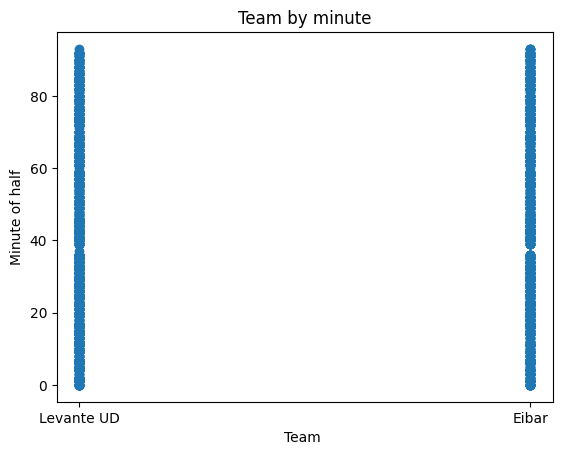

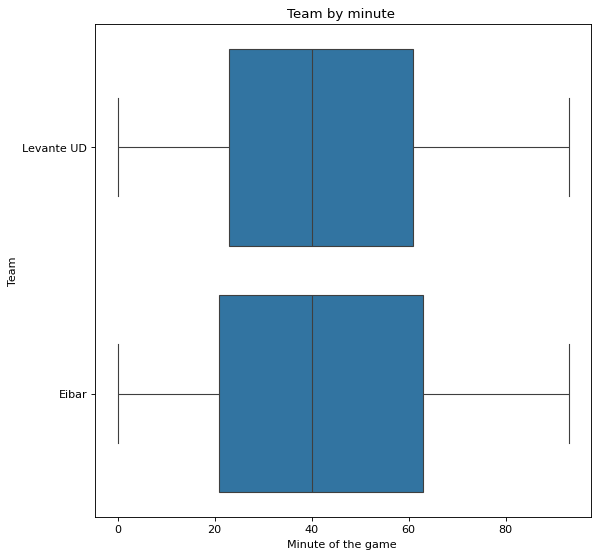

Team by minute is almost identical in both periods 

Mean Team by Period:
team
Eibar         1.396098
Levante UD    1.377700
Name: period, dtype: float64

Median Team by Period:
team
Eibar         1.0
Levante UD    1.0
Name: period, dtype: float64


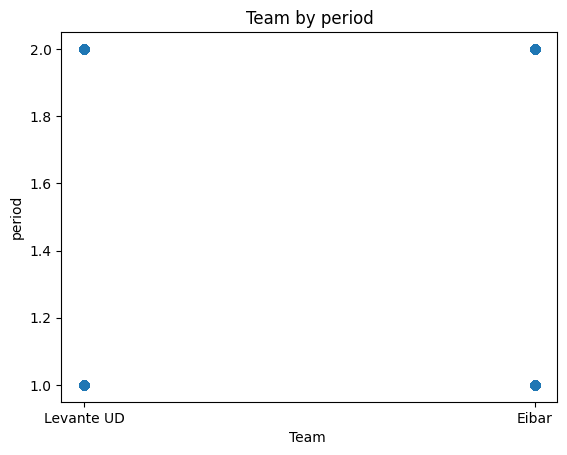

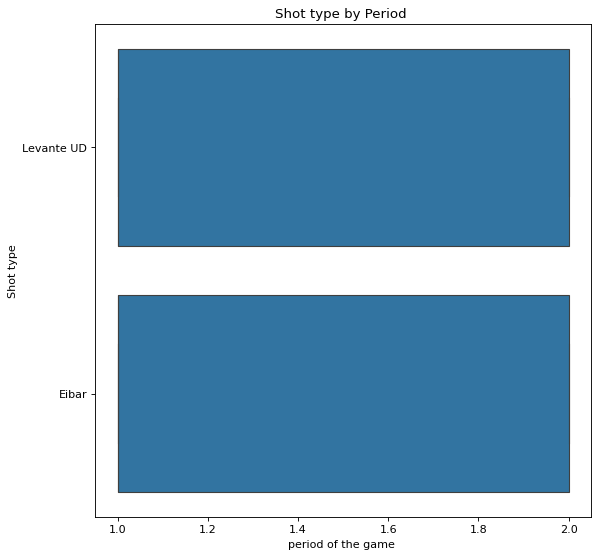

Teams are almost identical in both periods

Mean team by second:
team
Eibar         29.237489
Levante UD    30.191638
Name: second, dtype: float64

Median Team by second:
team
Eibar         29.0
Levante UD    31.0
Name: second, dtype: float64


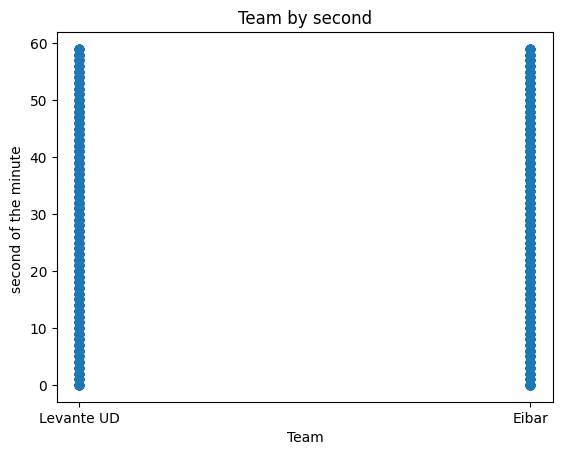

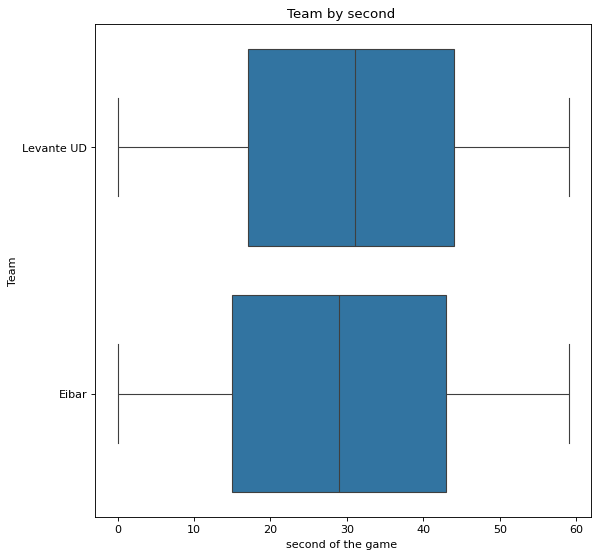

Eibar has possession marginally earlier in the minute than Levante

Mean team by Pass length :
team
Eibar         7.894572
Levante UD    8.436725
Name: pass_length, dtype: float64

Median Team by pass length :
team
Eibar         0.0
Levante UD    0.0
Name: pass_length, dtype: float64


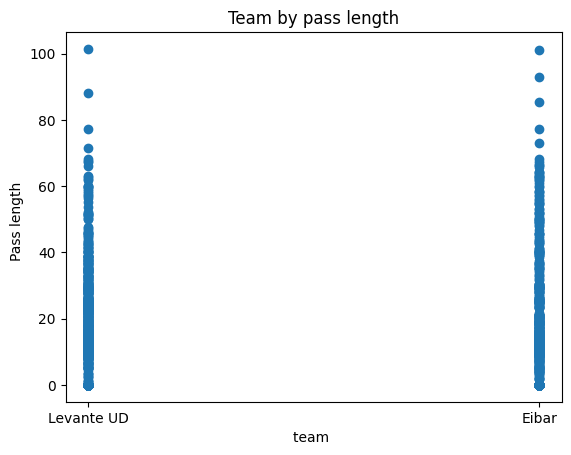

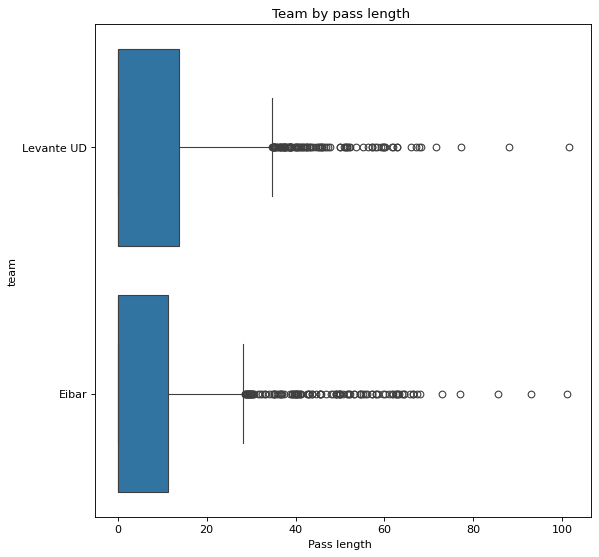

Levante pass length is marginally longer by around 3 meters than Eibar on average 



In [1831]:
#________________________________________team by minute _______________________________________________________

#Investigate shot technique and minute columns from our dataset.


#groupby the response to find the mean and median of the team with minutes separately.
print("Mean Team by minute:")
meanSalaryResponse=data.groupby('team')['minute'].mean()
print(meanSalaryResponse)

print("\nMedian Salary by Response:")
print(data.groupby('team')['minute'].median())

#plot the boxplot of team by minute
plt.scatter(data['team'],data['minute'])
plt.title("Team by minute")
plt.xlabel("Team ")
plt.ylabel("Minute of half")
plt.show()



# display the boxplot of Team by minute
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=data['minute'], y=data['team'])
plt.title("Team by minute ")
plt.xlabel("Minute of the game ")
plt.ylabel("Team")
plt.show()
print("Team by minute is almost identical in both periods \n")
 


#________________________________________team by period _______________________________________________________

#groupby the response to find the mean and median of the team with period separately.
print("Mean Team by Period:")
mean_team_period=data.groupby('team')['period'].mean()
print(mean_team_period)

print("\nMedian Team by Period:")
print(data.groupby('team')['period'].median())

#plot the boxplot of team by period
plt.scatter(data['team'],data['period'])
plt.title("Team by period")
plt.xlabel("Team ")
plt.ylabel("period")
plt.show()



# display the boxplot of team by period
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=data['period'], y=data['team'])
plt.title("Shot type by Period ")
plt.xlabel("period of the game ")
plt.ylabel("Shot type")
plt.show()
print("Teams are almost identical in both periods\n")


#________________________________________team by second _______________________________________________________

 #Investigate team and second columns from our dataset.

#groupby the response to find the mean and median of the team with second separately.
print("Mean team by second:")
mean_team_second=data.groupby('team')['second'].mean()
print(mean_team_second)

print("\nMedian Team by second:")
print(data.groupby('team')['second'].median())

#plot the boxplot of team by second
plt.scatter(data['team'],data['second'])
plt.title("Team by second")
plt.xlabel("Team")
plt.ylabel("second of the minute ")
plt.show()



# display the boxplot of team by second
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=data['second'], y=data['team'])
plt.title("Team by second ")
plt.xlabel("second of the game ")
plt.ylabel("Team")
plt.show()
print("Eibar has possession marginally earlier in the minute than Levante\n")


#________________________________________Team by pass length _______________________________________________________
 #Investigate team and pass length  columns from our dataset.

#groupby the response to find the mean and median of the team with pass length  separately.
print("Mean team by Pass length :")
mean_team_by_pass_length=data.groupby('team')['pass_length'].mean()
print(mean_team_by_pass_length)

print("\nMedian Team by pass length :")
print(data.groupby('team')['pass_length'].median())

#plot the boxplot of team by pass length
plt.scatter(data['team'],data['pass_length'])
plt.title("Team by pass length")
plt.xlabel("team ")
plt.ylabel("Pass length  ")
plt.show()


# display the boxplot of team by pass length
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=data['pass_length'], y=data['team'])
plt.title("Team by pass length ")
plt.xlabel("Pass length  ")
plt.ylabel("team")
plt.show()
print("Levante pass length is marginally longer by around 3 meters than Eibar on average \n")



Mean period by shot_outcome:
shot_technique
Half Volley    43.000000
Normal         46.076923
Volley         34.000000
Name: minute, dtype: float64

Median Salary by Response:
shot_technique
Half Volley    41.5
Normal         52.0
Volley         34.0
Name: minute, dtype: float64


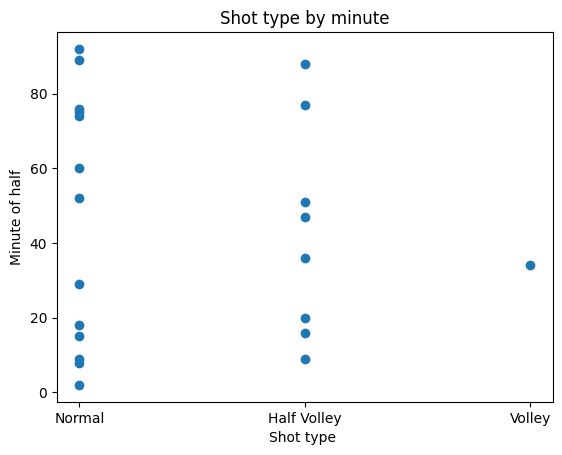

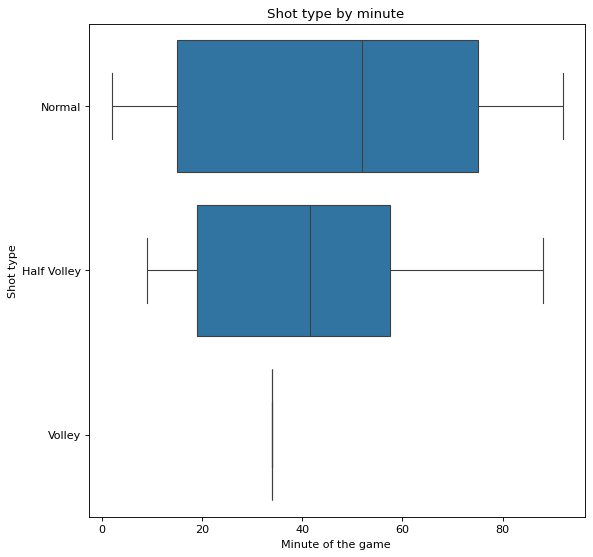

normal shots are taken most often, half volleys get taken almost as much as regular shots while volleys are very rare in the game
Mean period by shot_outcome:
shot_technique
Half Volley    1.500000
Normal         1.538462
Volley         1.000000
Name: period, dtype: float64

Median Salary by Response:
shot_technique
Half Volley    1.5
Normal         2.0
Volley         1.0
Name: period, dtype: float64


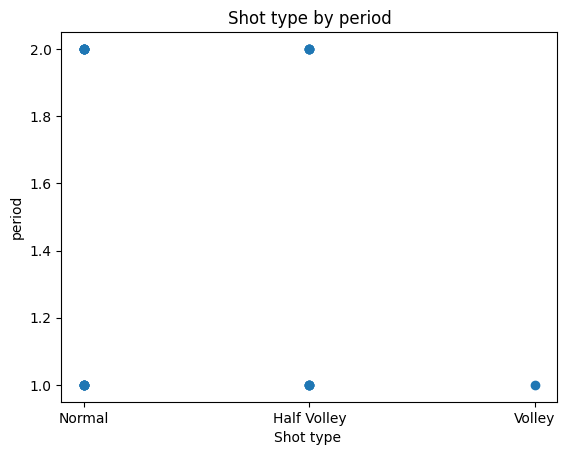

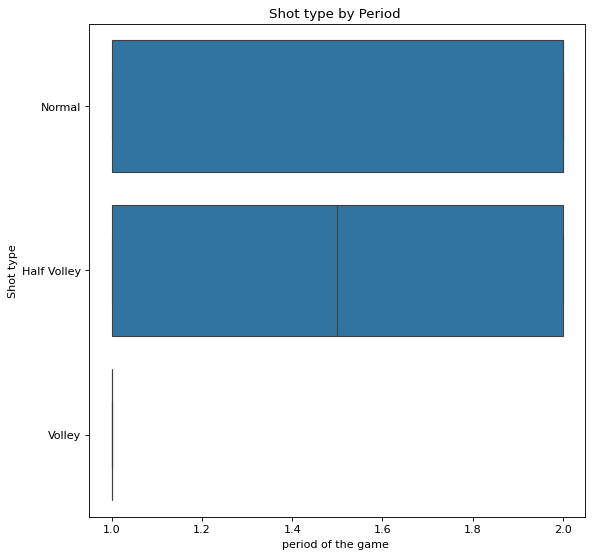

x
Mean period by shot_outcome:
shot_technique
Half Volley    34.125000
Normal         33.153846
Volley         57.000000
Name: second, dtype: float64

Median Salary by Response:
shot_technique
Half Volley    35.0
Normal         39.0
Volley         57.0
Name: second, dtype: float64


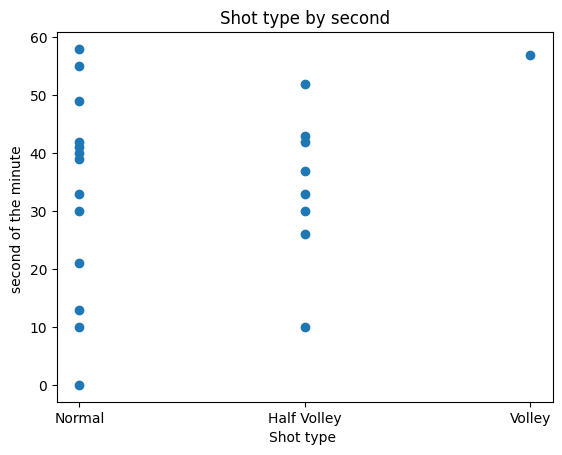

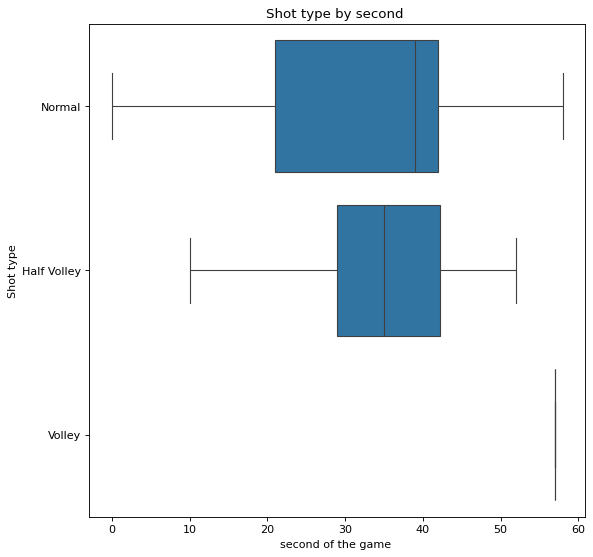

x


In [1832]:
#________________________________________shot technique by minute _______________________________________________________
# difficulty getting numerical and categorical to work as it goes out of bounds

#We analyze them mainly using mean, median, and box plots.
#Investigate shot technique and minute columns from our dataset.

filtered_Shot_technique = data[data['shot_technique'] != 'N/A']

#groupby the response to find the mean and median of the shot technique with minutes separately.
print("Mean period by shot_outcome:")
meanSalaryResponse=filtered_Shot_technique.groupby('shot_technique')['minute'].mean()
print(meanSalaryResponse)

print("\nMedian Salary by Response:")
print(filtered_Shot_technique.groupby('shot_technique')['minute'].median())

#plot the boxplot of shot technique by minute
plt.scatter(filtered_Shot_technique['shot_technique'],filtered_Shot_technique['minute'])
plt.title("Shot type by minute")
plt.xlabel("Shot type ")
plt.ylabel("Minute of half")
plt.show()



# display the boxplot of shot technique by minute
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_Shot_technique['minute'], y=filtered_Shot_technique['shot_technique'])
plt.title("Shot type by minute ")
plt.xlabel("Minute of the game ")
plt.ylabel("Shot type")
plt.show()
print("normal shots are taken most often, half volleys get taken almost as much as regular shots while volleys are very rare in the game")
 


#________________________________________shot technique by period _______________________________________________________

#groupby the response to find the mean and median of the shot technique with minutes separately.
print("Mean period by shot_outcome:")
meanSalaryResponse=filtered_Shot_technique.groupby('shot_technique')['period'].mean()
print(meanSalaryResponse)

print("\nMedian Salary by Response:")
print(filtered_Shot_technique.groupby('shot_technique')['period'].median())

#plot the boxplot of shot technique by minute
plt.scatter(filtered_Shot_technique['shot_technique'],filtered_Shot_technique['period'])
plt.title("Shot type by period")
plt.xlabel("Shot type ")
plt.ylabel("period")
plt.show()



# display the boxplot of shot technique by period
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_Shot_technique['period'], y=filtered_Shot_technique['shot_technique'])
plt.title("Shot type by Period ")
plt.xlabel("period of the game ")
plt.ylabel("Shot type")
plt.show()
print("x")


#________________________________________shot technique by second _______________________________________________________

 #Investigate shot technique and minute columns from our dataset.

#groupby the response to find the mean and median of the shot technique with minutes separately.
print("Mean period by shot_outcome:")
meanSalaryResponse=filtered_Shot_technique.groupby('shot_technique')['second'].mean()
print(meanSalaryResponse)

print("\nMedian Salary by Response:")
print(filtered_Shot_technique.groupby('shot_technique')['second'].median())

#plot the boxplot of shot technique by minute
plt.scatter(filtered_Shot_technique['shot_technique'],filtered_Shot_technique['second'])
plt.title("Shot type by second")
plt.xlabel("Shot type ")
plt.ylabel("second of the minute ")
plt.show()



# display the boxplot of shot technique by minute
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_Shot_technique['second'], y=filtered_Shot_technique['shot_technique'])
plt.title("Shot type by second ")
plt.xlabel("second of the game ")
plt.ylabel("Shot type")
plt.show()
print("x")


#### Duel Type

Mean Duel type by minute:
duel_type
Aerial Lost    49.362069
Tackle         48.121212
Name: minute, dtype: float64

Median Duel type by minute:
duel_type
Aerial Lost    45.5
Tackle         44.0
Name: minute, dtype: float64


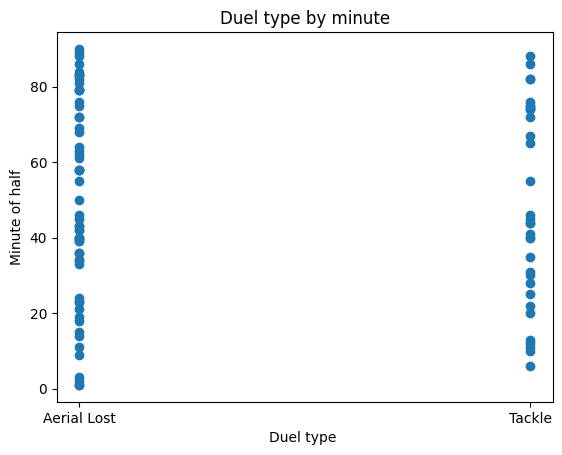

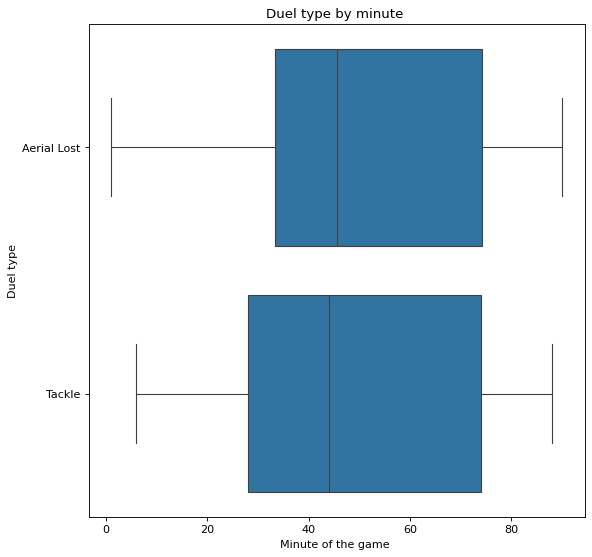

X
Mean Duel type by period:
duel_type
Aerial Lost    1.500000
Tackle         1.484848
Name: period, dtype: float64

Median Duel type by Period:
duel_type
Aerial Lost    1.5
Tackle         1.0
Name: period, dtype: float64


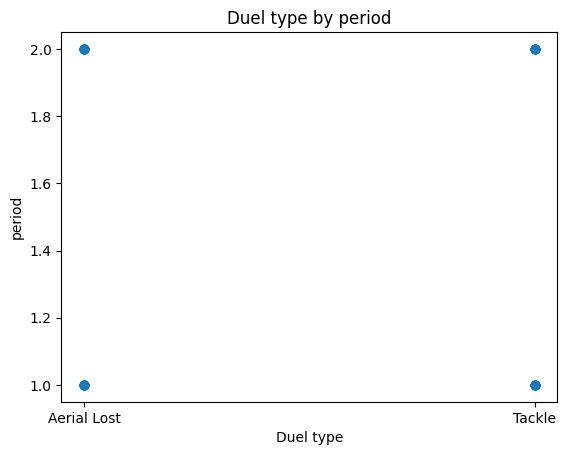

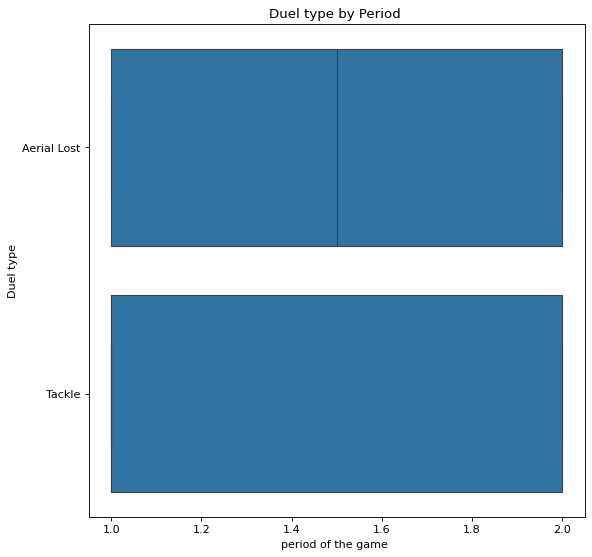

Duel types are identical for both periods

Mean Duel type by second:
duel_type
Aerial Lost    27.500000
Tackle         34.757576
Name: second, dtype: float64

Median Duel type by Second:
duel_type
Aerial Lost    26.0
Tackle         40.0
Name: second, dtype: float64


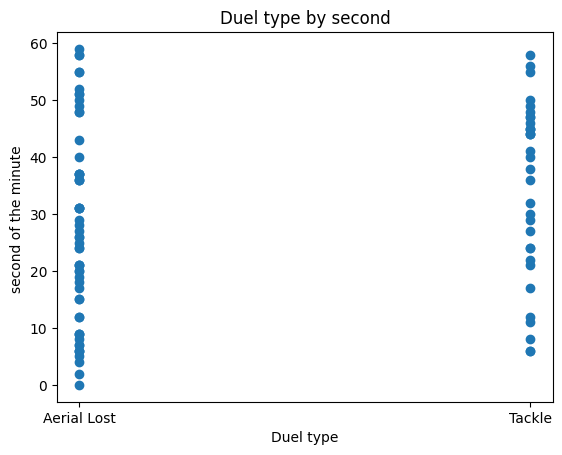

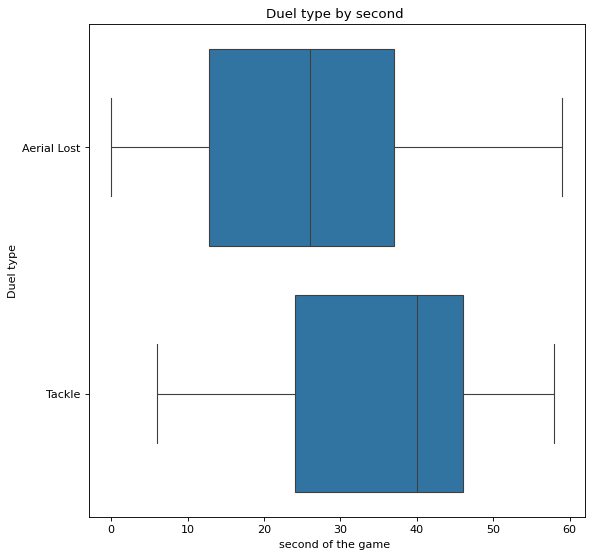

Ariel duels tend to happen around the 10 second to 35 second mark
 while the average tackle is taken in the second half of the minute
 
Mean duel type by Pass length :
duel_type
Aerial Lost    0.0
Tackle         0.0
Name: pass_length, dtype: float64

Median duel type by pass length :
duel_type
Aerial Lost    0.0
Tackle         0.0
Name: pass_length, dtype: float64


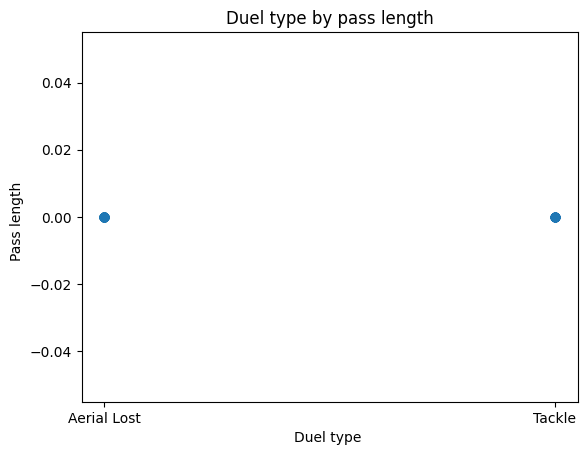

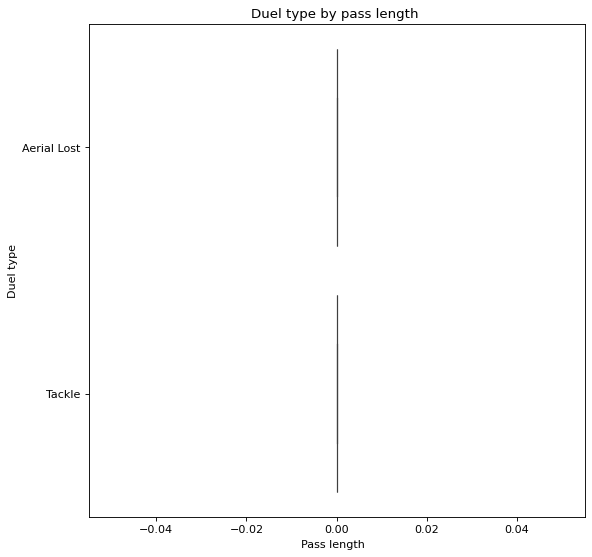

There is no correlation between the pass length and the duel type



In [1833]:
#________________________________________duel type by minute _______________________________________________________
#Investigate duel type and minute columns from our dataset.

filtered_duel_type = data[data['duel_type'] != 'N/A']

#groupby the response to find the mean and median of the duel type with minutes separately.
print("Mean Duel type by minute:")
mean_duel_type_minute=filtered_duel_type.groupby('duel_type')['minute'].mean()
print(mean_duel_type_minute)

print("\nMedian Duel type by minute:")
print(filtered_duel_type.groupby('duel_type')['minute'].median())

#plot the boxplot of duel type by minute
plt.scatter(filtered_duel_type['duel_type'],filtered_duel_type['minute'])
plt.title("Duel type by minute")
plt.xlabel("Duel type ")
plt.ylabel("Minute of half")
plt.show()



# display the boxplot of duel type by minute
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_duel_type['minute'], y=filtered_duel_type['duel_type'])
plt.title("Duel type by minute ")
plt.xlabel("Minute of the game ")
plt.ylabel("Duel type")
plt.show()
print("X")
 


#________________________________________duel type by period _______________________________________________________

#groupby the response to find the mean and median of the duel type with period separately.
print("Mean Duel type by period:")
mean_duel_type_period=filtered_duel_type.groupby('duel_type')['period'].mean()
print(mean_duel_type_period)

print("\nMedian Duel type by Period:")
print(filtered_duel_type.groupby('duel_type')['period'].median())

#plot the boxplot of Duel type by period
plt.scatter(filtered_duel_type['duel_type'],filtered_duel_type['period'])
plt.title("Duel type by period")
plt.xlabel("Duel type")
plt.ylabel("period")
plt.show()



# display the boxplot of duel type by period
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_duel_type['period'], y=filtered_duel_type['duel_type'])
plt.title("Duel type by Period ")
plt.xlabel("period of the game ")
plt.ylabel("Duel type")
plt.show()
print("Duel types are identical for both periods\n")


#________________________________________duel type by second _______________________________________________________

 #Investigate duel type and minute columns from our dataset.

#groupby the response to find the mean and median of the duel type with second separately.
print("Mean Duel type by second:")
mean_duel_type_second=filtered_duel_type.groupby('duel_type')['second'].mean()
print(mean_duel_type_second)

print("\nMedian Duel type by Second:")
print(filtered_duel_type.groupby('duel_type')['second'].median())

#plot the boxplot of duel type by second
plt.scatter(filtered_duel_type['duel_type'],filtered_duel_type['second'])
plt.title("Duel type by second")
plt.xlabel("Duel type")
plt.ylabel("second of the minute ")
plt.show()



# display the boxplot of duel type by second
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_duel_type['second'], y=filtered_duel_type['duel_type'])
plt.title("Duel type by second ")
plt.xlabel("second of the game ")
plt.ylabel("Duel type")
plt.show()
print("Ariel duels tend to happen around the 10 second to 35 second mark\n while the average tackle is taken in the second half of the minute\n ")

#________________________________________duel type by pass length _______________________________________________________
 #Investigate duel type and pass length  columns from our dataset.

#groupby the response to find the mean and median of the duel type with pass length  separately.
print("Mean duel type by Pass length :")
mean_duel_type_by_pass_length=filtered_duel_type.groupby('duel_type')['pass_length'].mean()
print(mean_duel_type_by_pass_length)

print("\nMedian duel type by pass length :")
print(filtered_duel_type.groupby('duel_type')['pass_length'].median())

#plot the boxplot of duel type by pass length
plt.scatter(filtered_duel_type['duel_type'],filtered_duel_type['pass_length'])
plt.title("Duel type by pass length")
plt.xlabel("Duel type ")
plt.ylabel("Pass length  ")
plt.show()


# display the boxplot of duel type by pass length
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_duel_type['pass_length'], y=filtered_duel_type['duel_type'])
plt.title("Duel type by pass length ")
plt.xlabel("Pass length  ")
plt.ylabel("Duel type")
plt.show()
print("There is no correlation between the pass length and the duel type\n")


#### Shot body part

Mean Shot body part by minute:
shot_body_part
Head          47.166667
Left Foot     40.500000
Right Foot    43.785714
Name: minute, dtype: float64

Median Shot body part by minute:
shot_body_part
Head          45.5
Left Foot     40.5
Right Foot    41.5
Name: minute, dtype: float64


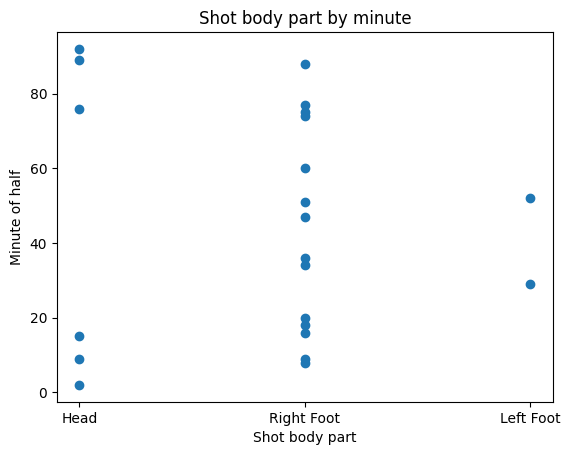

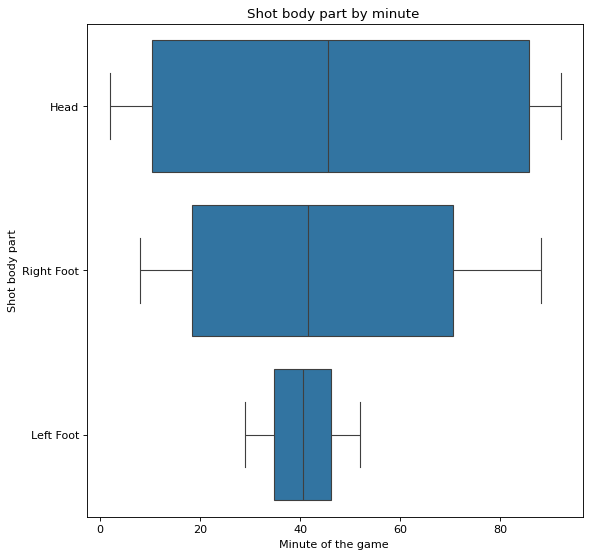

Headers are taken throughout the game while shots with the right foot happen most frequently occuring in the 20 to 65 minute mark
 while left footed shots where almost all taken at the end of the first half 
Mean Shot body part by period:
shot_body_part
Head          1.5
Left Foot     1.5
Right Foot    1.5
Name: period, dtype: float64

Median Shot body part by Period:
shot_body_part
Head          1.5
Left Foot     1.5
Right Foot    1.5
Name: period, dtype: float64


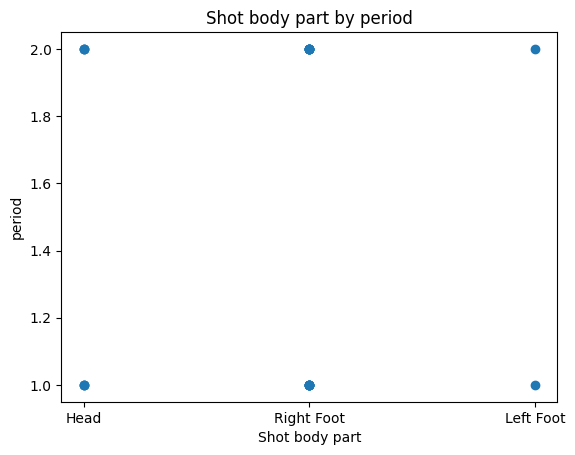

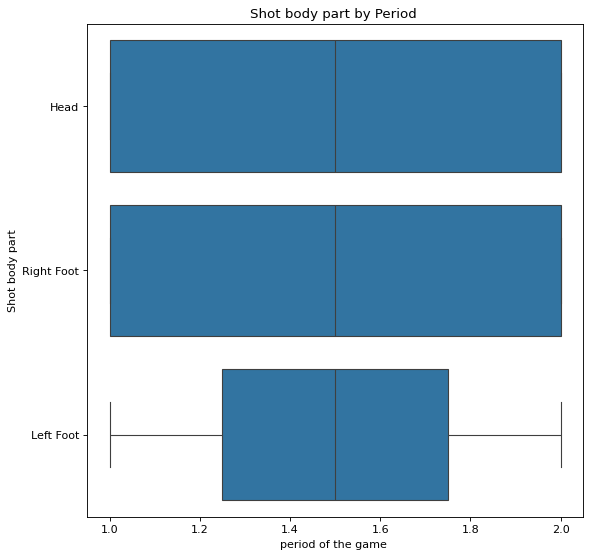

Shot body part by period was almost identical for both periods
Mean Shot body part by second:
shot_body_part
Head          43.666667
Left Foot     11.500000
Right Foot    34.000000
Name: second, dtype: float64

Median Shot body part by Second:
shot_body_part
Head          44.5
Left Foot     11.5
Right Foot    35.0
Name: second, dtype: float64


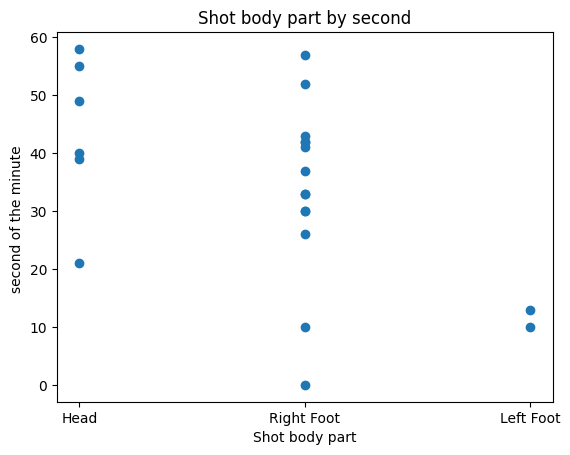

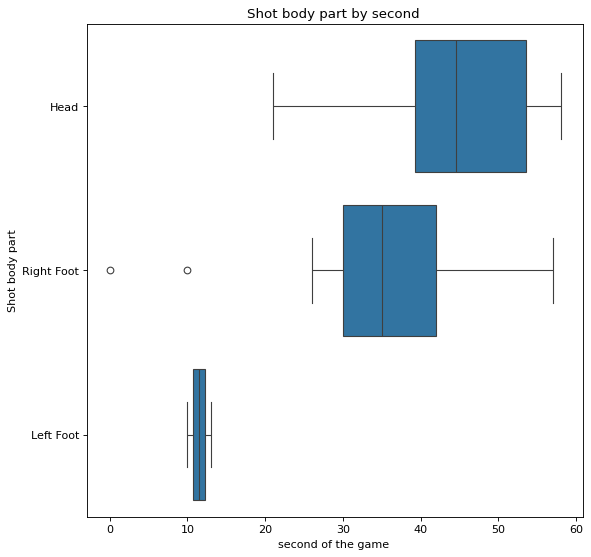

Shots and headers are take most often in the second half of the minute
 while left footed shots are taken early in the minute

Mean Shot body part by Pass length :
shot_body_part
Head          0.0
Left Foot     0.0
Right Foot    0.0
Name: pass_length, dtype: float64

Median Shot body part by pass length :
shot_body_part
Head          0.0
Left Foot     0.0
Right Foot    0.0
Name: pass_length, dtype: float64


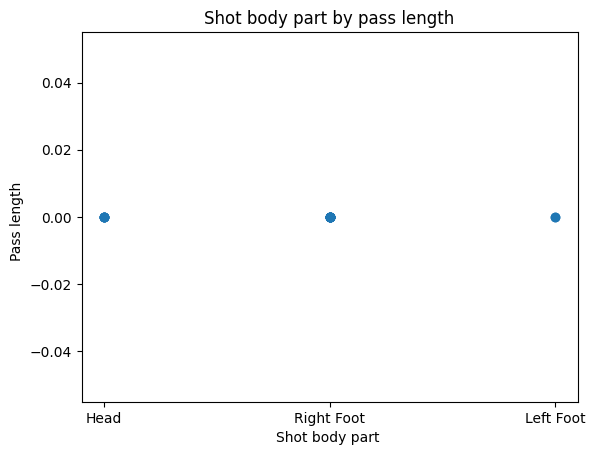

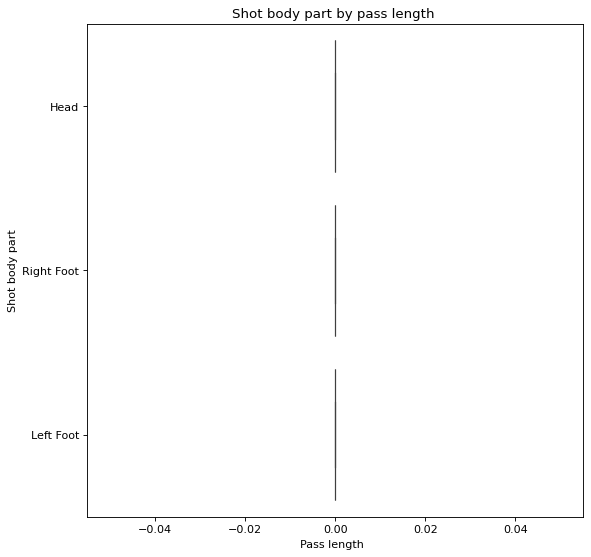

There is no correlation between the pass length and the shot body part



In [1834]:
#________________________________________Shot body part by minute _______________________________________________________
#Investigate Shot body part and minute columns from our dataset.

filtered_shot_body_part = data[data['shot_body_part'] != 'N/A']

#groupby the response to find the mean and median of the Shot body part with minutes separately.
print("Mean Shot body part by minute:")
mean_shot_body_part_minute=filtered_shot_body_part.groupby('shot_body_part')['minute'].mean()
print(mean_shot_body_part_minute)

print("\nMedian Shot body part by minute:")
print(filtered_shot_body_part.groupby('shot_body_part')['minute'].median())

#plot the boxplot of Shot body part by minute
plt.scatter(filtered_shot_body_part['shot_body_part'],filtered_shot_body_part['minute'])
plt.title("Shot body part by minute")
plt.xlabel("Shot body part")
plt.ylabel("Minute of half")
plt.show()



# display the boxplot of Shot body part by minute
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_body_part['minute'], y=filtered_shot_body_part['shot_body_part'])
plt.title("Shot body part by minute ")
plt.xlabel("Minute of the game ")
plt.ylabel("Shot body part")
plt.show()
print("Headers are taken throughout the game while shots with the right foot happen most frequently occuring in the 20 to 65 minute mark\n while left footed shots where almost all taken at the end of the first half ")
 


#________________________________________Shot body part by period _______________________________________________________

#groupby the response to find the mean and median of the Shot body part with period separately.
print("Mean Shot body part by period:")
mean_shot_body_part_period=filtered_shot_body_part.groupby('shot_body_part')['period'].mean()
print(mean_shot_body_part_period)

print("\nMedian Shot body part by Period:")
print(filtered_shot_body_part.groupby('shot_body_part')['period'].median())

#plot the boxplot of Shot body part by period
plt.scatter(filtered_shot_body_part['shot_body_part'],filtered_shot_body_part['period'])
plt.title("Shot body part by period")
plt.xlabel("Shot body part")
plt.ylabel("period")
plt.show()



# display the boxplot of Shot body part by period
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_body_part['period'], y=filtered_shot_body_part['shot_body_part'])
plt.title("Shot body part by Period ")
plt.xlabel("period of the game ")
plt.ylabel("Shot body part")
plt.show()
print("Shot body part by period was almost identical for both periods")


#________________________________________Shot body part by second _______________________________________________________

 #Investigate shot technique and minute columns from our dataset.

#groupby the response to find the mean and median of the Shot body part with second separately.
print("Mean Shot body part by second:")
mean_shot_body_part_second=filtered_shot_body_part.groupby('shot_body_part')['second'].mean()
print(mean_shot_body_part_second)

print("\nMedian Shot body part by Second:")
print(filtered_shot_body_part.groupby('shot_body_part')['second'].median())

#plot the boxplot of Shot body part by second
plt.scatter(filtered_shot_body_part['shot_body_part'],filtered_shot_body_part['second'])
plt.title("Shot body part by second")
plt.xlabel("Shot body part")
plt.ylabel("second of the minute ")
plt.show()



# display the boxplot of Shot body part by second
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_body_part['second'], y=filtered_shot_body_part['shot_body_part'])
plt.title("Shot body part by second ")
plt.xlabel("second of the game ")
plt.ylabel("Shot body part")
plt.show()
print("Shots and headers are take most often in the second half of the minute\n while left footed shots are taken early in the minute\n")


#________________________________________shot body part by pass length _______________________________________________________
 #Investigate shot body part and pass length  columns from our dataset.

#groupby the response to find the mean and median of the shot body part with pass length  separately.
print("Mean Shot body part by Pass length :")
mean_shot_body_part_by_pass_length=filtered_shot_body_part.groupby('shot_body_part')['pass_length'].mean()
print(mean_shot_body_part_by_pass_length)

print("\nMedian Shot body part by pass length :")
print(filtered_shot_body_part.groupby('shot_body_part')['pass_length'].median())

#plot the boxplot of shot body part by pass length
plt.scatter(filtered_shot_body_part['shot_body_part'],filtered_shot_body_part['pass_length'])
plt.title("Shot body part by pass length")
plt.xlabel("Shot body part ")
plt.ylabel("Pass length  ")
plt.show()


# display the boxplot of shot body part by pass length
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_body_part['pass_length'], y=filtered_shot_body_part['shot_body_part'])
plt.title("Shot body part by pass length ")
plt.xlabel("Pass length  ")
plt.ylabel("Shot body part")
plt.show()
print("There is no correlation between the pass length and the shot body part\n")



#### Shot first time 

Mean Shot first time by minute:
shot_first_time
False    45.733333
True     41.571429
Name: minute, dtype: float64

Median Shot first time by minute:
shot_first_time
False    51.0
True     34.0
Name: minute, dtype: float64


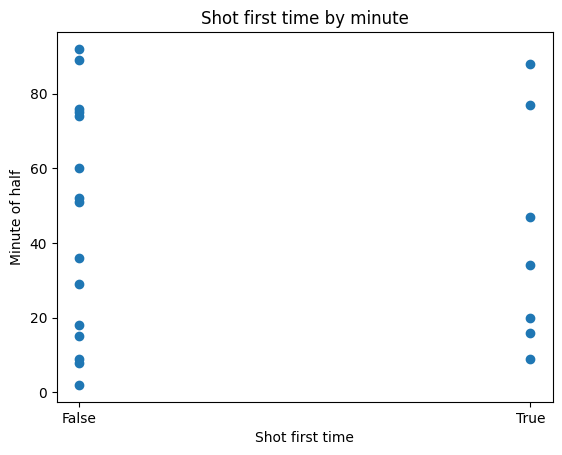

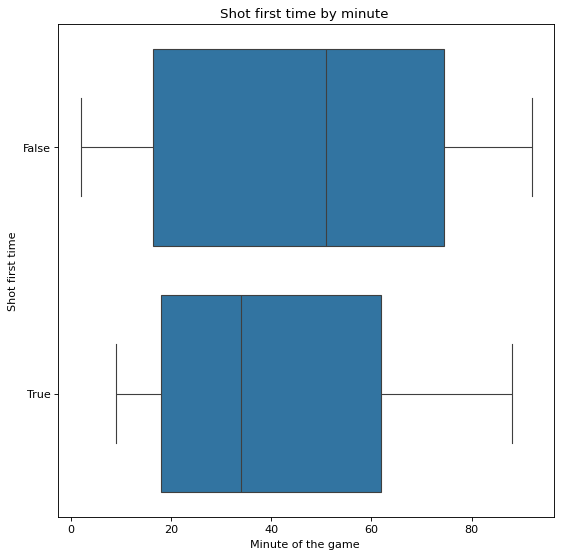

Shots first time occurred more frequently in the first half of the match
Mean Shot first time by period:
shot_first_time
False    1.533333
True     1.428571
Name: period, dtype: float64

Median Shot first time by Period:
shot_first_time
False    2.0
True     1.0
Name: period, dtype: float64


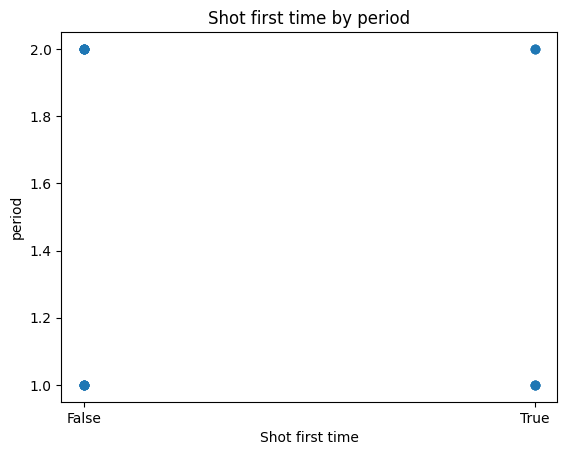

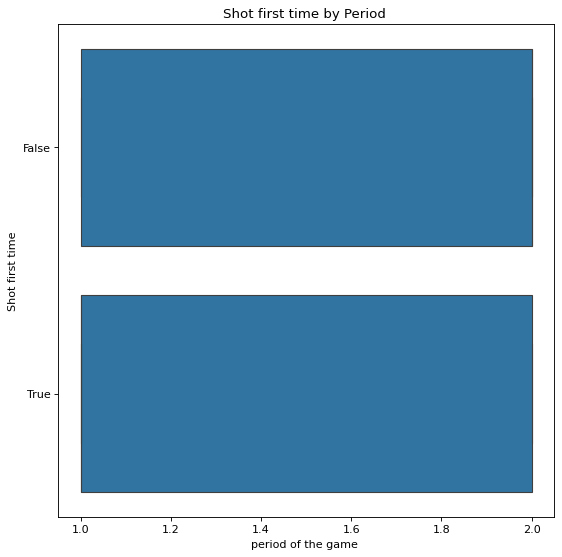

Shot first time by period was almost identical for both periods

Mean Shot first time by second:
shot_first_time
False    31.6
True     41.0
Name: second, dtype: float64

Median Shot first time by Second:
shot_first_time
False    33.0
True     42.0
Name: second, dtype: float64


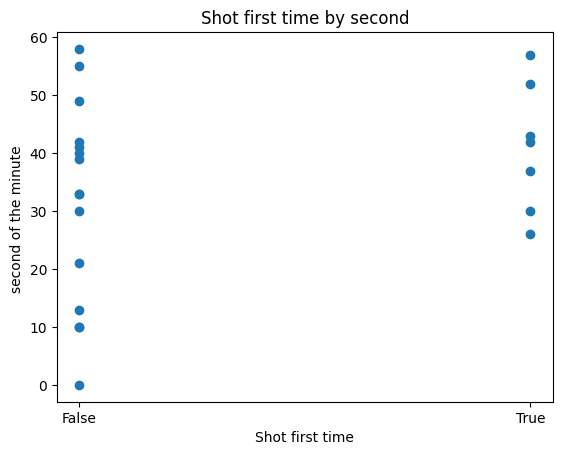

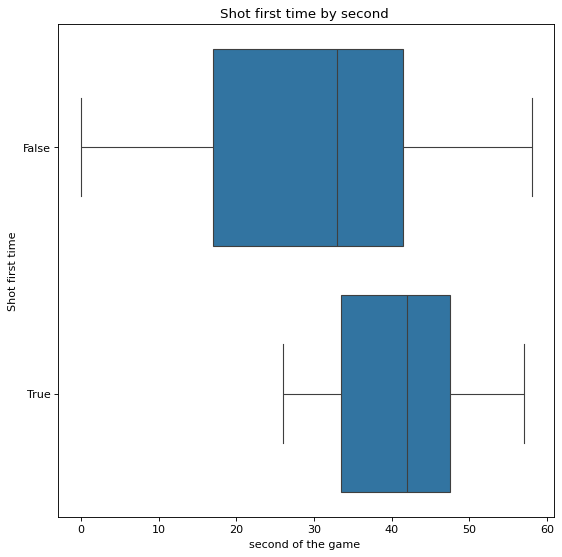

Shots taken first time are more frequent in the second half of the minute
 while regular shots are most frequent around the 20 to 40 second mark
Mean Shot First time by Pass length :
shot_first_time
False    0.0
True     0.0
Name: pass_length, dtype: float64

Median Shot first time by pass length :
shot_first_time
False    0.0
True     0.0
Name: pass_length, dtype: float64


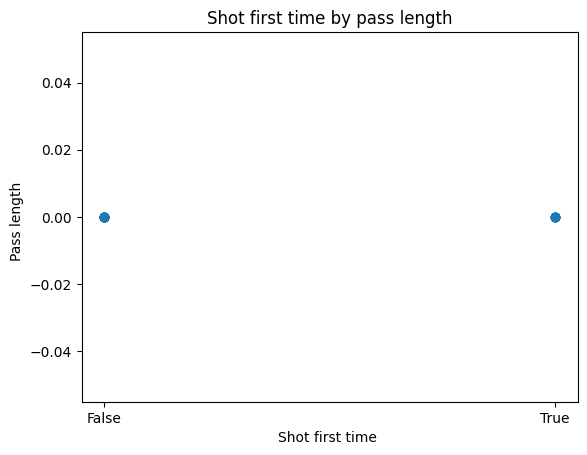

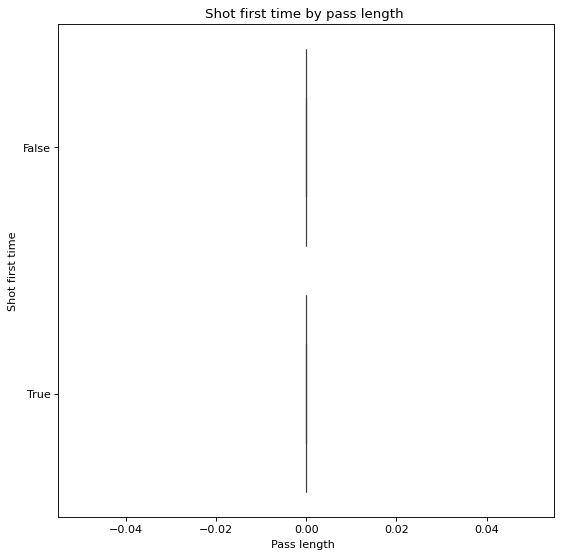

There is no correlation between the pass length and the shot first time



In [1835]:
#________________________________________Shot first time by minute _______________________________________________________
#Investigate Shot first time and minute columns from our dataset.

filtered_shot_first_time = data[data['shot_first_time'] != 'N/A']

#groupby the response to find the mean and median of the Shot first time with minutes separately.
print("Mean Shot first time by minute:")
mean_shot_first_time_minute=filtered_shot_first_time.groupby('shot_first_time')['minute'].mean()
print(mean_shot_first_time_minute)

print("\nMedian Shot first time by minute:")
print(filtered_shot_first_time.groupby('shot_first_time')['minute'].median())

#plot the boxplot of Shot first time by minute
plt.scatter(filtered_shot_first_time['shot_first_time'],filtered_shot_first_time['minute'])
plt.title("Shot first time by minute")
plt.xlabel("Shot first time")
plt.ylabel("Minute of half")
plt.show()



# display the boxplot of Shot first time by minute
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_first_time['minute'], y=filtered_shot_first_time['shot_first_time'])
plt.title("Shot first time by minute ")
plt.xlabel("Minute of the game ")
plt.ylabel("Shot first time")
plt.show()
print("Shots first time occurred more frequently in the first half of the match")
 


#________________________________________Shot first time by period _______________________________________________________

#groupby the response to find the mean and median of the Shot first time with period separately.
print("Mean Shot first time by period:")
mean_shot_first_time_period=filtered_shot_first_time.groupby('shot_first_time')['period'].mean()
print(mean_shot_first_time_period)

print("\nMedian Shot first time by Period:")
print(filtered_shot_first_time.groupby('shot_first_time')['period'].median())

#plot the boxplot of Shot first time by period
plt.scatter(filtered_shot_first_time['shot_first_time'],filtered_shot_first_time['period'])
plt.title("Shot first time by period")
plt.xlabel("Shot first time")
plt.ylabel("period")
plt.show()



# display the boxplot of Shot first time by period
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_first_time['period'], y=filtered_shot_first_time['shot_first_time'])
plt.title("Shot first time by Period ")
plt.xlabel("period of the game ")
plt.ylabel("Shot first time")
plt.show()
print("Shot first time by period was almost identical for both periods\n")


#________________________________________Shot first time  by second _______________________________________________________

 #Investigate shot shot_first_time and minute columns from our dataset.

#groupby the response to find the mean and median of the Shot first time with second separately.
print("Mean Shot first time by second:")
mean_shot_first_time_second=filtered_shot_first_time.groupby('shot_first_time')['second'].mean()
print(mean_shot_first_time_second)

print("\nMedian Shot first time by Second:")
print(filtered_shot_first_time.groupby('shot_first_time')['second'].median())

#plot the boxplot of Shot first time by second
plt.scatter(filtered_shot_first_time['shot_first_time'],filtered_shot_first_time['second'])
plt.title("Shot first time by second")
plt.xlabel("Shot first time")
plt.ylabel("second of the minute ")
plt.show()



# display the boxplot of Shot first time by second
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_first_time['second'], y=filtered_shot_first_time['shot_first_time'])
plt.title("Shot first time by second ")
plt.xlabel("second of the game ")
plt.ylabel("Shot first time")
plt.show()
print("Shots taken first time are more frequent in the second half of the minute\n while regular shots are most frequent around the 20 to 40 second mark")

#________________________________________shot first time by pass length _______________________________________________________
 #Investigate shot first time and pass length  columns from our dataset.

#groupby the response to find the mean and median of the shot first time with pass length  separately.
print("Mean Shot First time by Pass length :")
mean_shot_first_time_pass_length=filtered_shot_first_time.groupby('shot_first_time')['pass_length'].mean()
print(mean_shot_first_time_pass_length)

print("\nMedian Shot first time by pass length :")
print(filtered_shot_first_time.groupby('shot_first_time')['pass_length'].median())

#plot the boxplot of shot first time by pass length
plt.scatter(filtered_shot_first_time['shot_first_time'],filtered_shot_first_time['pass_length'])
plt.title("Shot first time by pass length")
plt.xlabel("Shot first time ")
plt.ylabel("Pass length  ")
plt.show()


# display the boxplot of shot first time by pass length
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_first_time['pass_length'], y=filtered_shot_first_time['shot_first_time'])
plt.title("Shot first time by pass length ")
plt.xlabel("Pass length  ")
plt.ylabel("Shot first time")
plt.show()
print("There is no correlation between the pass length and the shot first time\n")

#### Shot outcome

Mean Shot outcome by minute:
shot_outcome
Blocked    46.000000
Goal       49.750000
Off T      23.750000
Post       34.000000
Saved      14.000000
Wayward    84.333333
Name: minute, dtype: float64

Median Shot outcome by minute:
shot_outcome
Blocked    44.0
Goal       49.0
Off T      16.5
Post       34.0
Saved      14.0
Wayward    88.0
Name: minute, dtype: float64


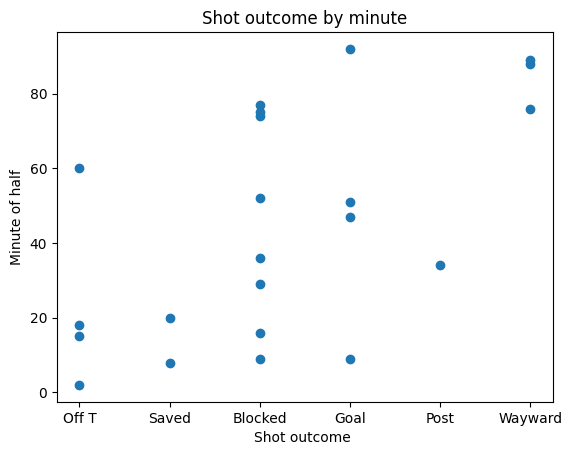

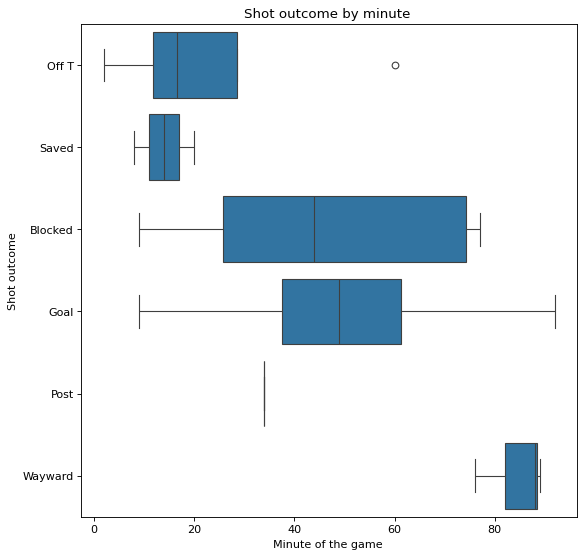

Shots off target occur more frequently in the first half. While saves tend to be made earlier in the game 
 blocks occur throughout the game
shots are taken during the whole game while there is a noticeable wayward shot occurrence during the end of the second half
Mean Shot outcome by period:
shot_outcome
Blocked    1.50
Goal       1.75
Off T      1.25
Post       1.00
Saved      1.00
Wayward    2.00
Name: period, dtype: float64

Median Shot outcome by Period:
shot_outcome
Blocked    1.5
Goal       2.0
Off T      1.0
Post       1.0
Saved      1.0
Wayward    2.0
Name: period, dtype: float64


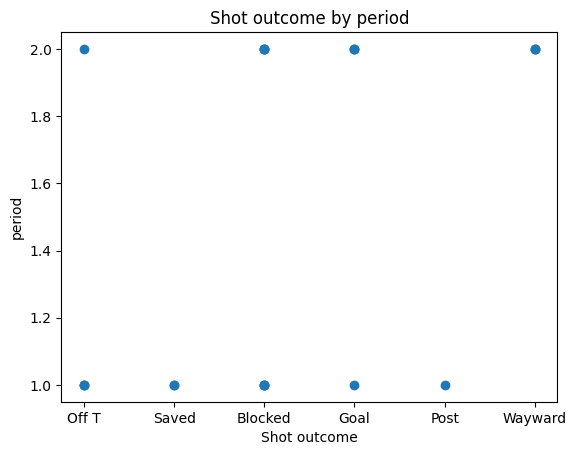

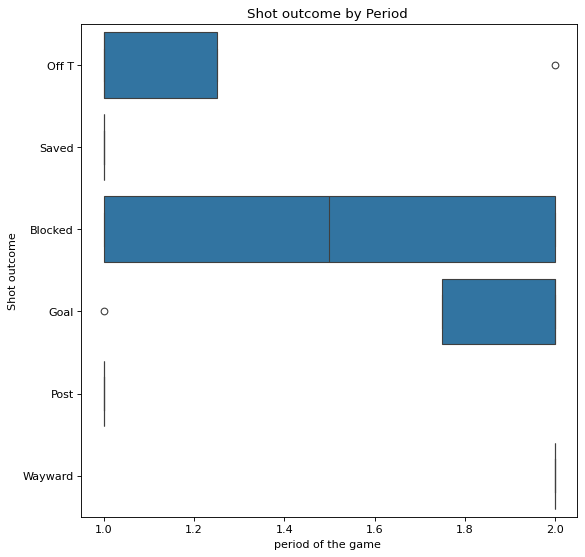

It appears the shots off target happened more often in the first half where as blocked shots and shots happened frequently during both periods but more goals were scored in the second half

Mean Shot outcome by second:
shot_outcome
Blocked    27.125000
Goal       32.000000
Off T      42.500000
Post       57.000000
Saved      35.000000
Wayward    39.666667
Name: second, dtype: float64

Median Shot outcome by Second:
shot_outcome
Blocked    29.5
Goal       34.5
Off T      41.0
Post       57.0
Saved      35.0
Wayward    43.0
Name: second, dtype: float64


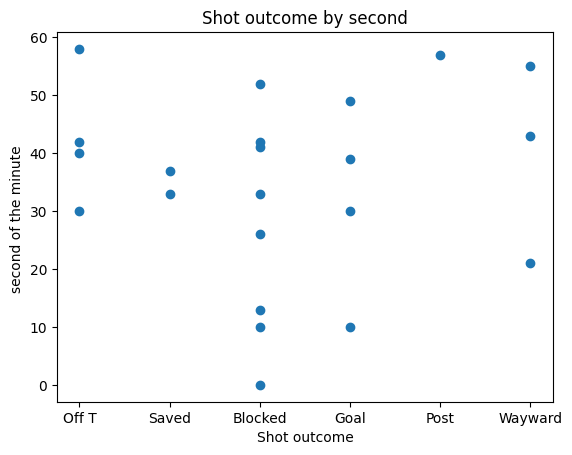

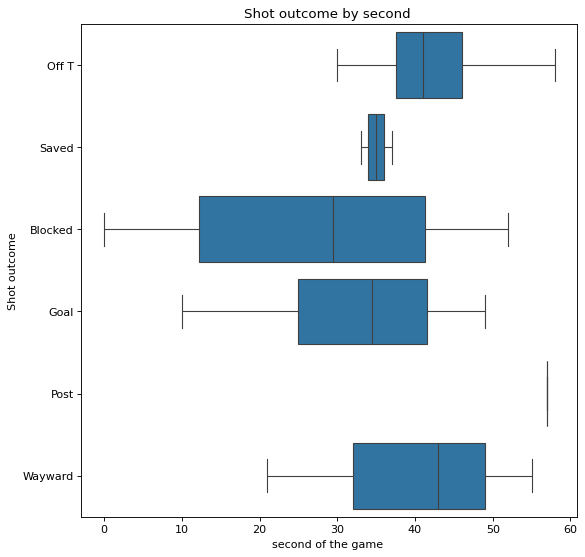

Shots that are off target or irregular have a higher frequency of happening in the later stage of the minute 
 Goals occurred around the 25 to 40 second mark 
 Shots blocked occurred frequently during the game 

Mean Shot outcome by Pass length :
shot_outcome
Blocked    0.0
Goal       0.0
Off T      0.0
Post       0.0
Saved      0.0
Wayward    0.0
Name: pass_length, dtype: float64

Median Shot outcome by pass length :
shot_outcome
Blocked    0.0
Goal       0.0
Off T      0.0
Post       0.0
Saved      0.0
Wayward    0.0
Name: pass_length, dtype: float64


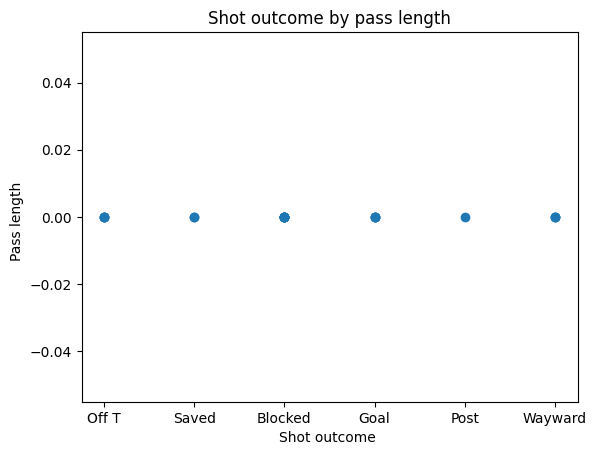

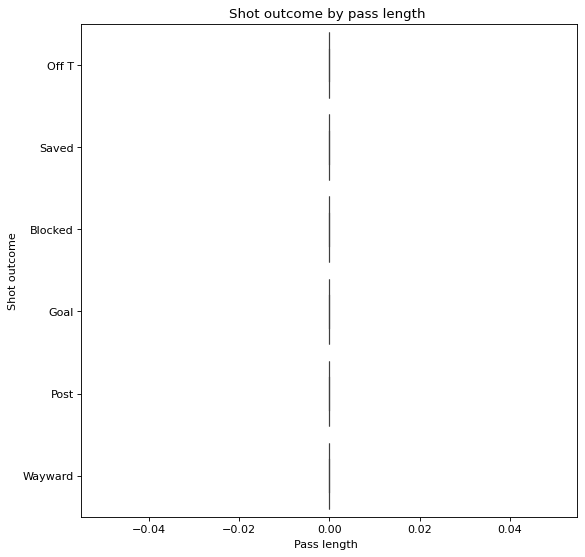

There is no correlation between the pass length and the shot outcome



In [1836]:
#________________________________________Shot outcome by minute _______________________________________________________
#Investigate Shot outcome and minute columns from our dataset.

filtered_shot_outcome = data[data['shot_outcome'] != 'N/A']

#groupby the response to find the mean and median of the Shot outcome with minutes separately.
print("Mean Shot outcome by minute:")
mean_shot_outcome_minute=filtered_shot_outcome.groupby('shot_outcome')['minute'].mean()
print(mean_shot_outcome_minute)

print("\nMedian Shot outcome by minute:")
print(filtered_shot_outcome.groupby('shot_outcome')['minute'].median())

#plot the boxplot of Shot outcome by minute
plt.scatter(filtered_shot_outcome['shot_outcome'],filtered_shot_outcome['minute'])
plt.title("Shot outcome by minute")
plt.xlabel("Shot outcome ")
plt.ylabel("Minute of half")
plt.show()



# display the boxplot of Shot outcome by minute
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_outcome['minute'], y=filtered_shot_outcome['shot_outcome'])
plt.title("Shot outcome by minute ")
plt.xlabel("Minute of the game ")
plt.ylabel("Shot outcome")
plt.show()
print("Shots off target occur more frequently in the first half. While saves tend to be made earlier in the game \n blocks occur throughout the game\nshots are taken during the whole game while there is a noticeable wayward shot occurrence during the end of the second half")
 


#________________________________________Shot outcome by period _______________________________________________________

#groupby the response to find the mean and median of the Shot outcome with period separately.
print("Mean Shot outcome by period:")
mean_shot_outcome_period=filtered_shot_outcome.groupby('shot_outcome')['period'].mean()
print(mean_shot_outcome_period)

print("\nMedian Shot outcome by Period:")
print(filtered_shot_outcome.groupby('shot_outcome')['period'].median())

#plot the boxplot of Shot outcome by period
plt.scatter(filtered_shot_outcome['shot_outcome'],filtered_shot_outcome['period'])
plt.title("Shot outcome by period")
plt.xlabel("Shot outcome")
plt.ylabel("period")
plt.show()



# display the boxplot of Shot outcome by period
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_outcome['period'], y=filtered_shot_outcome['shot_outcome'])
plt.title("Shot outcome by Period ")
plt.xlabel("period of the game ")
plt.ylabel("Shot outcome")
plt.show()
print("It appears the shots off target happened more often in the first half where as blocked shots and shots happened frequently during both periods but more goals were scored in the second half\n")


#________________________________________Shot outcome by second _______________________________________________________

 #Investigate shot outcome and minute columns from our dataset.

#groupby the response to find the mean and median of the Shot outcome with second separately.
print("Mean Shot outcome by second:")
mean_shot_outcome_second=filtered_shot_outcome.groupby('shot_outcome')['second'].mean()
print(mean_shot_outcome_second)

print("\nMedian Shot outcome by Second:")
print(filtered_shot_outcome.groupby('shot_outcome')['second'].median())

#plot the boxplot of Shot outcome by second
plt.scatter(filtered_shot_outcome['shot_outcome'],filtered_shot_outcome['second'])
plt.title("Shot outcome by second")
plt.xlabel("Shot outcome")
plt.ylabel("second of the minute ")
plt.show()



# display the boxplot of Shot outcome by second
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_outcome['second'], y=filtered_shot_outcome['shot_outcome'])
plt.title("Shot outcome by second ")
plt.xlabel("second of the game ")
plt.ylabel("Shot outcome")
plt.show()
print("Shots that are off target or irregular have a higher frequency of happening in the later stage of the minute \n Goals occurred around the 25 to 40 second mark \n Shots blocked occurred frequently during the game \n")


#________________________________________shot outcome by pass length _______________________________________________________
 #Investigate shot outcome and pass length  columns from our dataset.

#groupby the response to find the mean and median of the shot outcome with pass length  separately.
print("Mean Shot outcome by Pass length :")
mean_shot_outcome_by_pass_length=filtered_shot_outcome.groupby('shot_outcome')['pass_length'].mean()
print(mean_shot_outcome_by_pass_length)

print("\nMedian Shot outcome by pass length :")
print(filtered_shot_outcome.groupby('shot_outcome')['pass_length'].median())

#plot the boxplot of shot outcome by pass length
plt.scatter(filtered_shot_outcome['shot_outcome'],filtered_shot_outcome['pass_length'])
plt.title("Shot outcome by pass length")
plt.xlabel("Shot outcome ")
plt.ylabel("Pass length  ")
plt.show()


# display the boxplot of shot outcome by pass length
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_outcome['pass_length'], y=filtered_shot_outcome['shot_outcome'])
plt.title("Shot outcome by pass length ")
plt.xlabel("Pass length  ")
plt.ylabel("Shot outcome")
plt.show()
print("There is no correlation between the pass length and the shot outcome\n")



#### Pass outcome

Mean Pass outcome by minute:
pass_outcome
Complete            45.275753
Incomplete          47.700000
Injury Clearance    68.000000
Out                 42.892857
Pass Offside        56.000000
Unknown             56.750000
Name: minute, dtype: float64

Median Pass outcome by minute:
pass_outcome
Complete            45.0
Incomplete          49.0
Injury Clearance    68.0
Out                 42.5
Pass Offside        67.0
Unknown             68.0
Name: minute, dtype: float64


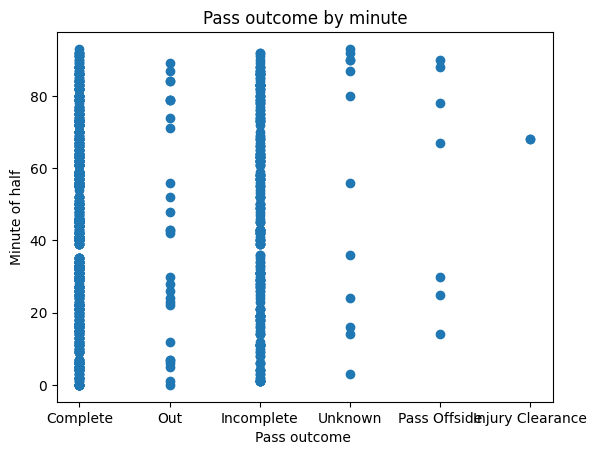

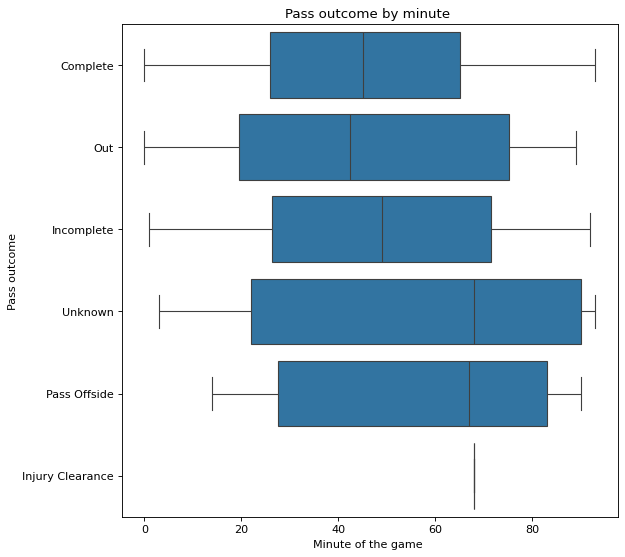

On average complete passes , out passes and incomplete passes occur throughout the game at an average of the 45th min 
 while unknown passes and offside passes occur more frequently in the second half

Mean Pass outcome by period:
pass_outcome
Complete            1.489699
Incomplete          1.530435
Injury Clearance    2.000000
Out                 1.428571
Pass Offside        1.571429
Unknown             1.583333
Name: period, dtype: float64

Median Pass outcome by Period:
pass_outcome
Complete            1.0
Incomplete          2.0
Injury Clearance    2.0
Out                 1.0
Pass Offside        2.0
Unknown             2.0
Name: period, dtype: float64


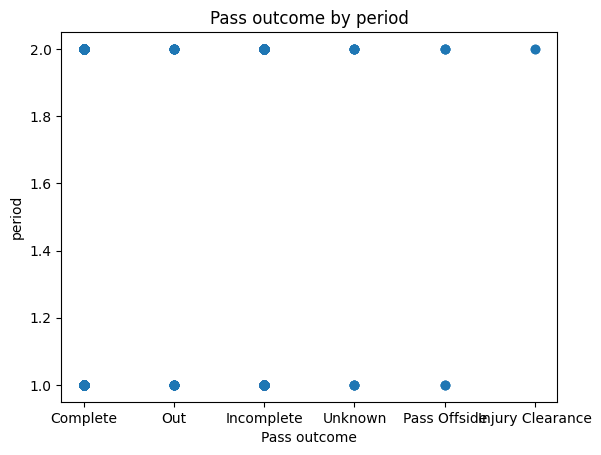

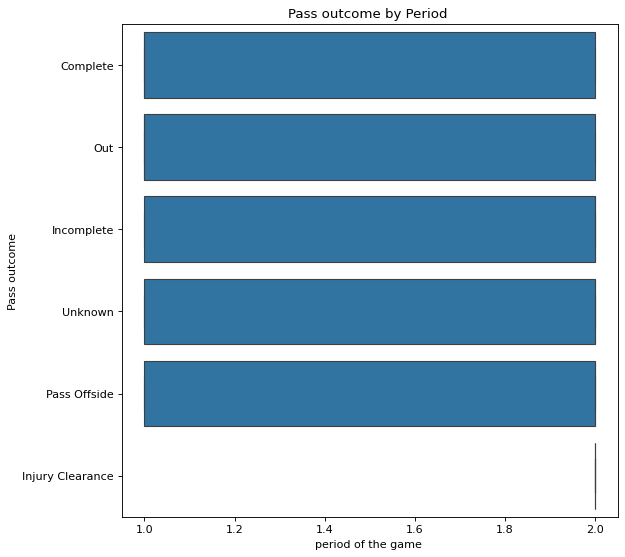

There appears to be no correlation between the pass outcome and the period of the game

Mean Pass outcome by second:
pass_outcome
Complete            30.093502
Incomplete          27.921739
Injury Clearance    45.000000
Out                 31.607143
Pass Offside        22.285714
Unknown             28.833333
Name: second, dtype: float64

Median Pass outcome by Second:
pass_outcome
Complete            31.0
Incomplete          26.0
Injury Clearance    45.0
Out                 29.0
Pass Offside        20.0
Unknown             23.5
Name: second, dtype: float64


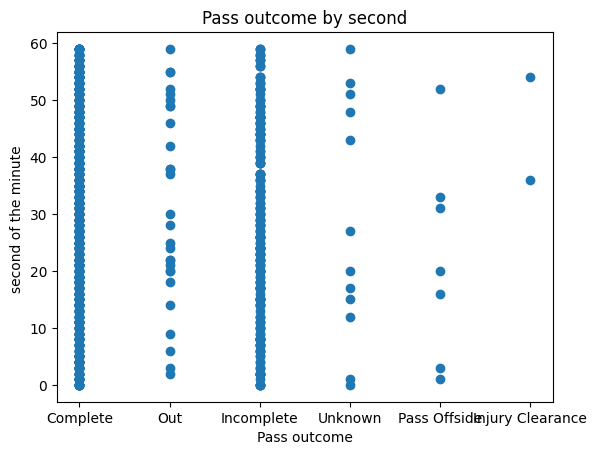

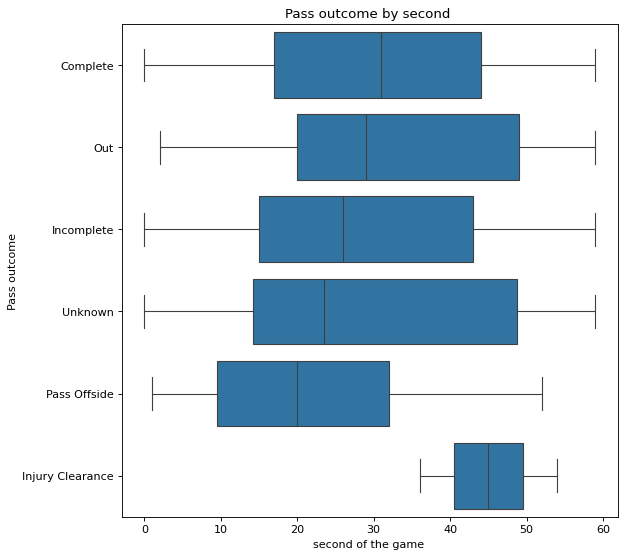

The average occurrence for complete, out and incomplete are similar occurring around the same period of a minute 
while passes that where offside happened more frequently earlier in the minute 
 while injury cleaned occurred later on in the minute
 
Mean Pass outcome by Pass length :
pass_outcome
Complete            21.585103
Incomplete          26.478261
Injury Clearance    15.150000
Out                 35.707143
Pass Offside        36.957143
Unknown             34.616667
Name: pass_length, dtype: float64

Median Pass outcome by pass length :
pass_outcome
Complete            17.60
Incomplete          24.40
Injury Clearance    15.15
Out                 31.25
Pass Offside        43.20
Unknown             28.55
Name: pass_length, dtype: float64


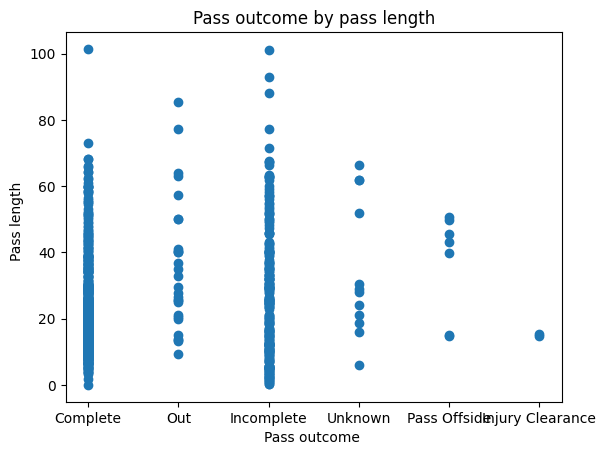

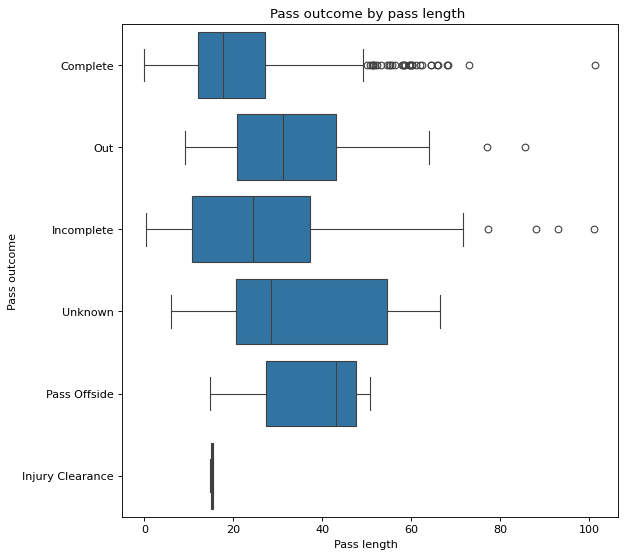

On average, completed passes where between the 15 to 25 mark 
 passes that went out of play where on average between the 20 to 45 meter mark
 incomplete passes fall between complete passes and out passes
 Passes that where offside occurred at an average length of 25+ meters


In [1837]:
#________________________________________Pass outcome by minute _______________________________________________________
#Investigate Pass outcome and minute columns from our dataset.

filtered_pass_outcome = data[data['pass_outcome'] != 'N/A']

#groupby the response to find the mean and median of the pass outcome with minutes separately.
print("Mean Pass outcome by minute:")
mean_pass_outcome_minute=filtered_pass_outcome.groupby('pass_outcome')['minute'].mean()
print(mean_pass_outcome_minute)

print("\nMedian Pass outcome by minute:")
print(filtered_pass_outcome.groupby('pass_outcome')['minute'].median())

#plot the boxplot of Pass outcome by minute
plt.scatter(filtered_pass_outcome['pass_outcome'],filtered_pass_outcome['minute'])
plt.title("Pass outcome by minute")
plt.xlabel("Pass outcome ")
plt.ylabel("Minute of half")
plt.show()



# display the boxplot of Pass outcome by minute
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_pass_outcome['minute'], y=filtered_pass_outcome['pass_outcome'])
plt.title("Pass outcome by minute ")
plt.xlabel("Minute of the game ")
plt.ylabel("Pass outcome")
plt.show()
print("On average complete passes , out passes and incomplete passes occur throughout the game at an average of the 45th min \n while unknown passes and offside passes occur more frequently in the second half\n")
 


#________________________________________Pass outcome by period _______________________________________________________

#groupby the response to find the mean and median of the Pass outcome with period separately.
print("Mean Pass outcome by period:")
mean_pass_outcome_period=filtered_pass_outcome.groupby('pass_outcome')['period'].mean()
print(mean_pass_outcome_period)

print("\nMedian Pass outcome by Period:")
print(filtered_pass_outcome.groupby('pass_outcome')['period'].median())

#plot the boxplot of Pass outcome by period
plt.scatter(filtered_pass_outcome['pass_outcome'],filtered_pass_outcome['period'])
plt.title("Pass outcome by period")
plt.xlabel("Pass outcome")
plt.ylabel("period")
plt.show()



# display the boxplot of Pass outcome by period
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_pass_outcome['period'], y=filtered_pass_outcome['pass_outcome'])
plt.title("Pass outcome by Period ")
plt.xlabel("period of the game ")
plt.ylabel("Pass outcome")
plt.show()
print("There appears to be no correlation between the pass outcome and the period of the game\n")


#________________________________________Pass outcome by second _______________________________________________________

 #Investigate Pass outcome and minute columns from our dataset.

#groupby the response to find the mean and median of the Pass outcome with second separately.
print("Mean Pass outcome by second:")
mean_pass_outcome_second=filtered_pass_outcome.groupby('pass_outcome')['second'].mean()
print(mean_pass_outcome_second)

print("\nMedian Pass outcome by Second:")
print(filtered_pass_outcome.groupby('pass_outcome')['second'].median())

#plot the boxplot of Pass outcome by second
plt.scatter(filtered_pass_outcome['pass_outcome'],filtered_pass_outcome['second'])
plt.title("Pass outcome by second")
plt.xlabel("Pass outcome")
plt.ylabel("second of the minute ")
plt.show()



# display the boxplot of Pass outcome by second
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_pass_outcome['second'], y=filtered_pass_outcome['pass_outcome'])
plt.title("Pass outcome by second ")
plt.xlabel("second of the game ")
plt.ylabel("Pass outcome")
plt.show()
print("The average occurrence for complete, out and incomplete are similar occurring around the same period of a minute \nwhile passes that where offside happened more frequently earlier in the minute \n while injury cleaned occurred later on in the minute\n ")

#________________________________________Pass outcome by pass length _______________________________________________________
 #Investigate Pass outcome and pass length  columns from our dataset.

#groupby the response to find the mean and median of the Pass outcome with pass length  separately.
print("Mean Pass outcome by Pass length :")
mean_pass_outcome_by_pass_length=filtered_pass_outcome.groupby('pass_outcome')['pass_length'].mean()
print(mean_pass_outcome_by_pass_length)

print("\nMedian Pass outcome by pass length :")
print(filtered_pass_outcome.groupby('pass_outcome')['pass_length'].median())

#plot the boxplot of Pass outcome by pass length
plt.scatter(filtered_pass_outcome['pass_outcome'],filtered_pass_outcome['pass_length'])
plt.title("Pass outcome by pass length")
plt.xlabel("Pass outcome ")
plt.ylabel("Pass length  ")
plt.show()


# display the boxplot of Pass outcome by pass length
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_pass_outcome['pass_length'], y=filtered_pass_outcome['pass_outcome'])
plt.title("Pass outcome by pass length ")
plt.xlabel("Pass length  ")
plt.ylabel("Pass outcome")
plt.show()
print("On average, completed passes where between the 15 to 25 mark \n passes that went out of play where on average between the 20 to 45 meter mark\n incomplete passes fall between complete passes and out passes\n Passes that where offside occurred at an average length of 25+ meters")


### Categorical - Categorical

#### Duel outcome

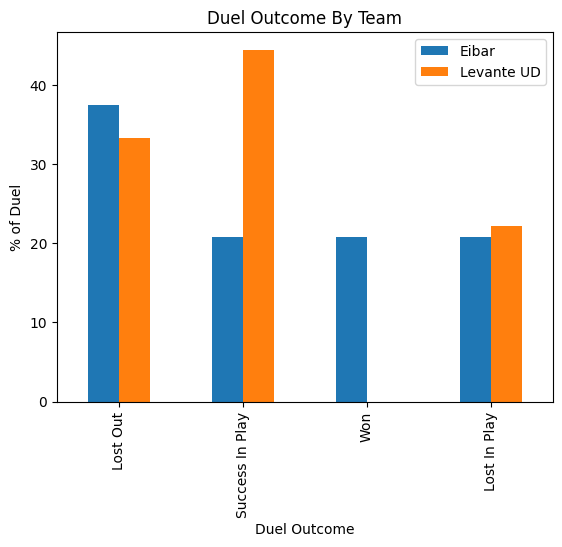

Levante have a marginally better tackling success rate than Eibar


In [1842]:
#________________________________________Duel outcome / Duel type _______________________________________________________

#________________________________________Duel outcome / Duel type _______________________________________________________

#________________________________________Duel outcome / Pass outcome _______________________________________________________

#________________________________________Duel outcome / shot body part _______________________________________________________

#________________________________________Duel outcome / first time _______________________________________________________

#________________________________________Duel outcome / shot outcome _______________________________________________________

#________________________________________Duel outcome / Shot technique _______________________________________________________

#________________________________________Duel outcome / team _______________________________________________________

# Filter data by team and N/A from duel outcome above
eibar_data = filtered_DuelOutcome[filtered_DuelOutcome['team'] == 'Eibar']
levante_data = filtered_DuelOutcome[filtered_DuelOutcome['team'] == 'Levante UD'] 

# Calculate the percentage of each duel outcome probability by team.
eibar_data_percentages = eibar_data['duel_outcome'].value_counts(normalize=True)*100
levante_data_percentages = levante_data['duel_outcome'].value_counts(normalize=True)*100

# Plot the bar chart for the duel outcome by team .
# It was a challenge to be able to joint the two teams together and compare them tried with hue at first. settled with using concat
team_dueling = pd.concat([eibar_data_percentages, levante_data_percentages], axis=1, keys=['Eibar', 'Levante UD'])
team_dueling.plot.bar()
plt.title("Duel Outcome By Team")
plt.xlabel("Duel Outcome")
plt.ylabel("% of Duel")
plt.show() #Show the plot
print("Levante have a marginally better tackling success rate than Eibar") 


#### Duel Type

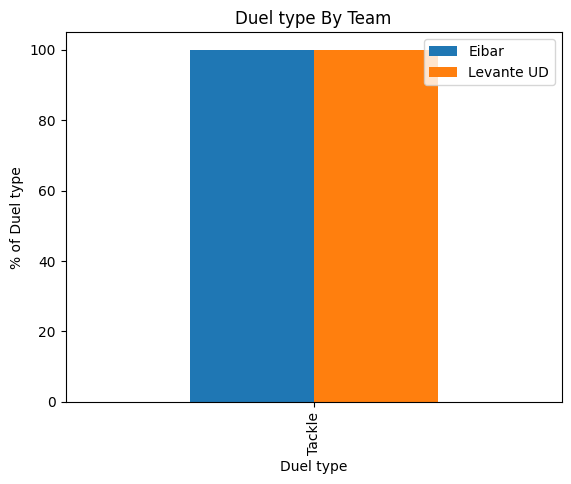

In [1841]:
#________________________________________Duel type/ Pass outcome _______________________________________________________

#________________________________________Duel type/ shot body part _______________________________________________________

#________________________________________Duel type/ shot first time _______________________________________________________

#________________________________________Duel type/ shot outcome _______________________________________________________

#________________________________________Duel type/ shot technique _______________________________________________________

#________________________________________Duel type/ team _______________________________________________________

# Calculate the percentage of each tackle outcome probability by team.
eibar_data_percentages = eibar_data['duel_type'].value_counts(normalize=True)*100
levante_data_percentages = levante_data['duel_type'].value_counts(normalize=True)*100

# Plot the bar chart for the duel type by team .
# It was a challenge to be able to joint the two teams together and compare them tried with hue at first. settled with using concat
team_dueling = pd.concat([eibar_data_percentages, levante_data_percentages], axis=1, keys=['Eibar', 'Levante UD'])
team_dueling.plot.bar()
plt.title("Duel type By Team")
plt.xlabel("Duel type")
plt.ylabel("% of Duel type")
plt.show() #Show the plot
print("Both teams had the same information") 


#### Pass outcome

In [ ]:
#________________________________________Pass outcome/ shot body part _______________________________________________________

#________________________________________Pass outcome/ shot first time _______________________________________________________

#________________________________________Pass outcome/ shot outcome _______________________________________________________

#________________________________________Pass outcome/ technique _______________________________________________________

#________________________________________Pass outcome/ team _______________________________________________________



#### Shot body part

In [ ]:
#________________________________________Shot body part/ shot first time _______________________________________________________

#________________________________________Shot body part/ shot outcome _______________________________________________________

#________________________________________Shot body part/ shot technique _______________________________________________________

#________________________________________Shot body part/ team _______________________________________________________






#### Shot first time

In [ ]:
#________________________________________Shot first time/ shot outcome _______________________________________________________

#________________________________________Shot first time/ shot technique _______________________________________________________

#________________________________________Shot first time/ team _______________________________________________________


#### Shot outcome

In [ ]:
#________________________________________Shot outcome/ technique _______________________________________________________
#________________________________________Shot outcome/ team _______________________________________________________

#### Shot technique + Team

In [ ]:
#________________________________________Team /Shot technique   _______________________________________________________

#### Other

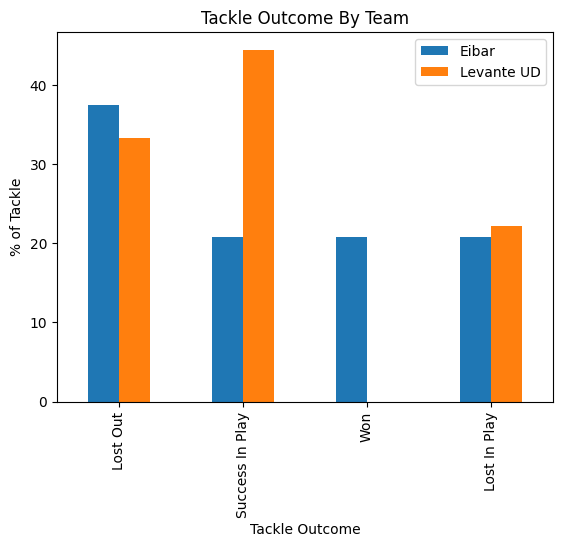

Levante have a marginally better tackling success rate than Eibar


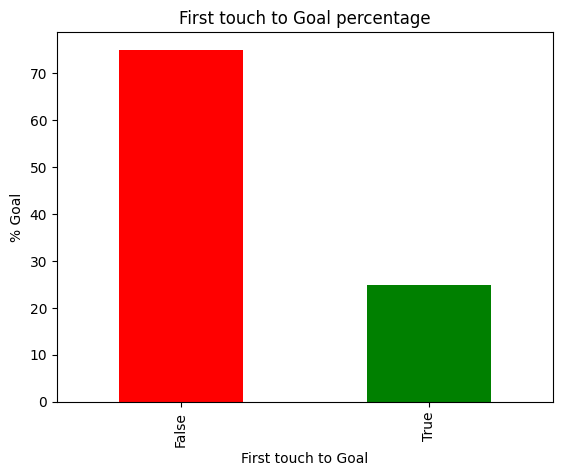

First touch goals make up 25% of all goals scored in the game


In [1838]:
#________________________________________Shot first time / goal_______________________________________________________


# Filter data by shot outcome to only be goal
goal_outcome_data = data[data['shot_outcome'] == 'Goal'] 

# Calculate the percentage of shots taken first time that where goals 
shot_firstime_percentages = goal_outcome_data['shot_first_time'].value_counts(normalize=True)*100

# Plot the bar chart for the goals outcome by first touch .
shot_firstime_percentages.plot.bar(color =['red','green'])
plt.title("First touch to Goal percentage")
plt.xlabel("First touch to Goal")
plt.ylabel("% Goal")

plt.show() #Show the plot
print("First touch goals make up 25% of all goals scored in the game") 

#________________________________________Header by goal and on target_______________________________________________________



#_______________________________________Total amount of passes leading to shots_______________________________________________________




## Multivariate Analysis

               minute    second  pass_length
minute       1.000000 -0.011631      0.09180
second      -0.011631  1.000000     -0.01931
pass_length  0.091800 -0.019310      1.00000


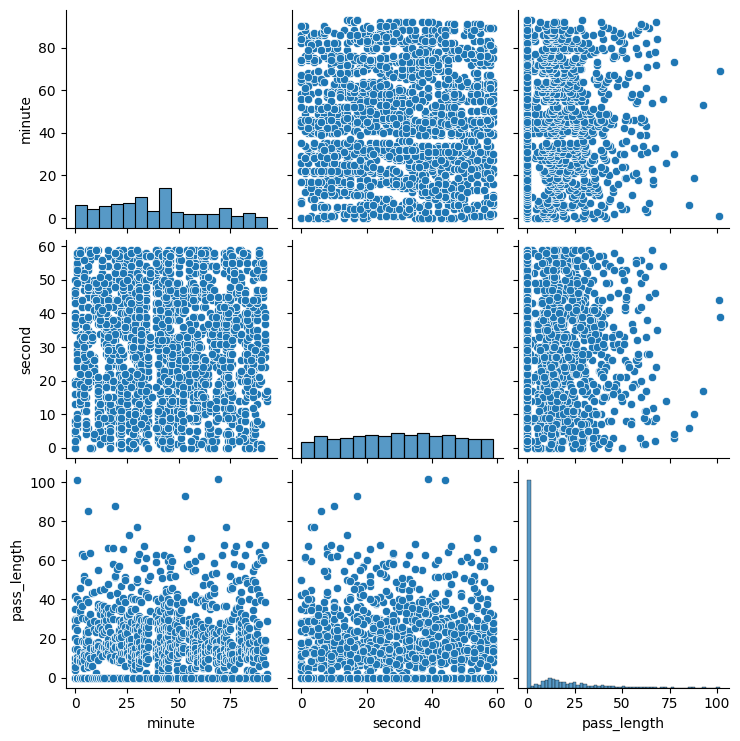

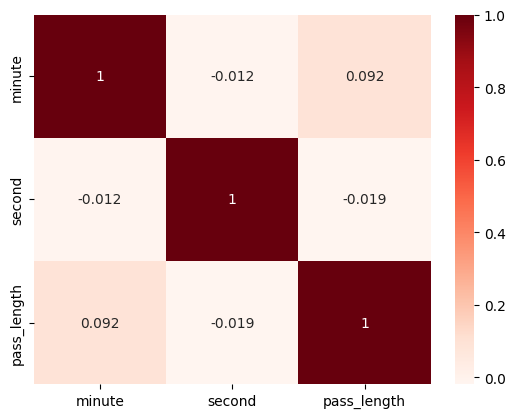

               minute    period  pass_length
minute       1.000000  0.840723      0.09180
period       0.840723  1.000000      0.11242
pass_length  0.091800  0.112420      1.00000


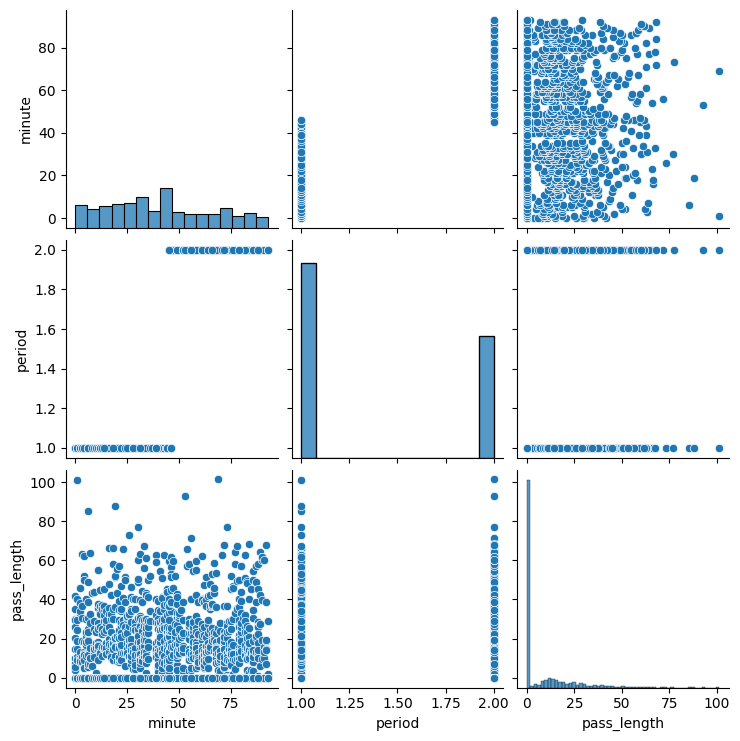

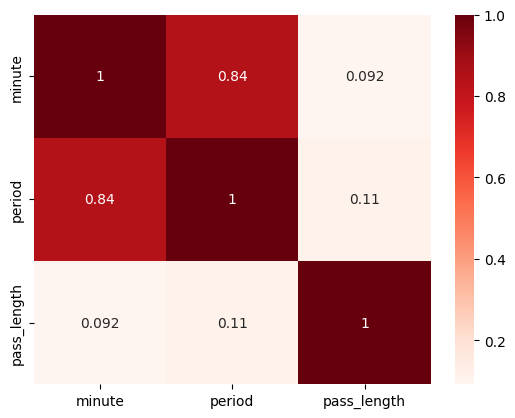

               period    second  pass_length
period       1.000000 -0.004735      0.11242
second      -0.004735  1.000000     -0.01931
pass_length  0.112420 -0.019310      1.00000


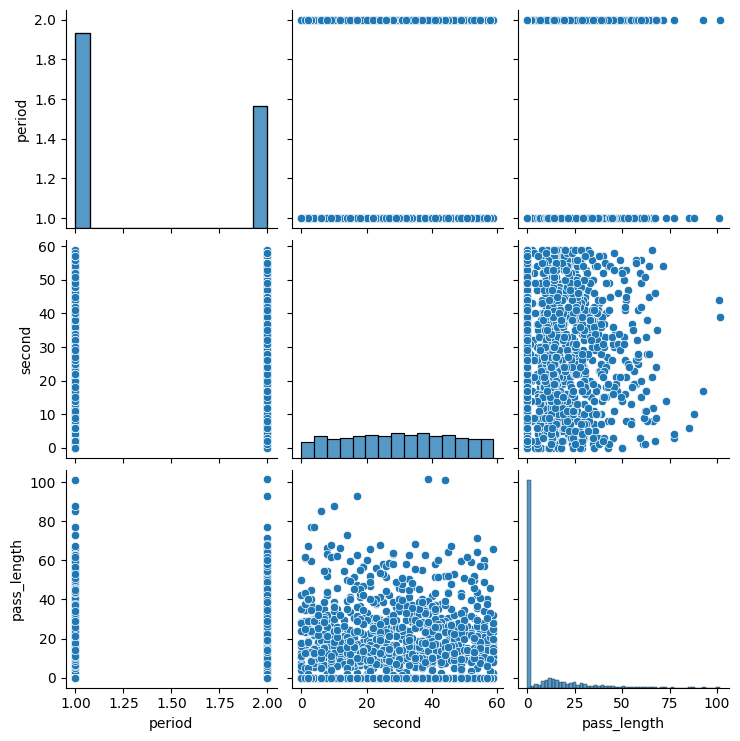

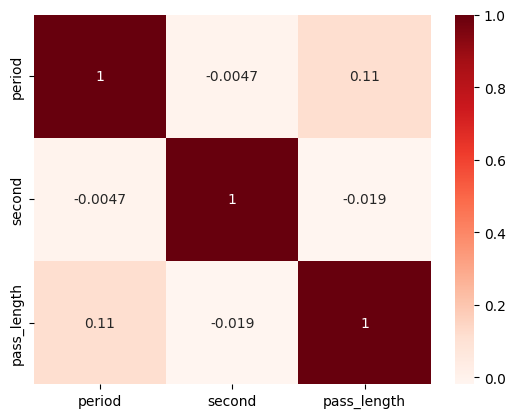

          period    second    minute
period  1.000000 -0.004735  0.840723
second -0.004735  1.000000 -0.011631
minute  0.840723 -0.011631  1.000000


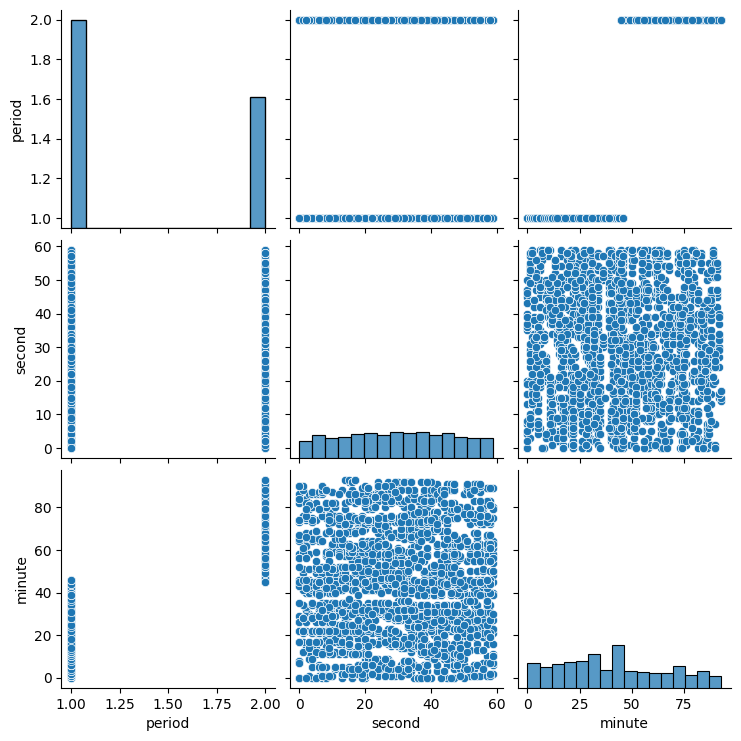

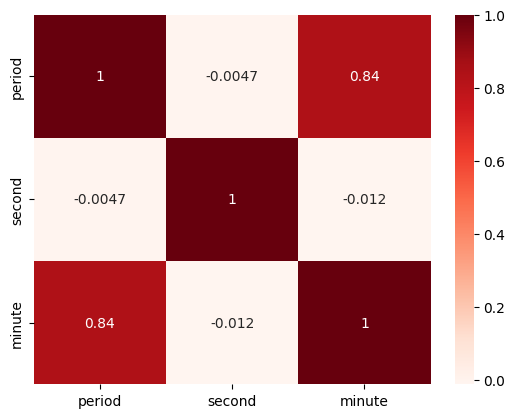

In [1839]:
#________________________________________Regular shot / target /period +- 5 before the end of the half_______________________________________________________
#9.Analyzing the probability of a player trying to take a regular shot on goal near the end of the first and second halves(+/- 5 minutes before the half ends


#10. 5.Investigating which team is more likely to fail a tackle in the first half compared to the second half



#If we analyze data by taking there or more variables/columns into consideration from a dataset, it is known as Multivariate Analysis.
#Let’s investigate how ‘Education’, ‘Marital’, and ‘Response_rate’ vary with each other.
#First, we’ll create a pivot table with the three columns and after that, we’ll create a heatmap.

#Pivot table automatically uses the mean value of the response_rate argument.
####result = pd.pivot_table(data=data, index='education', columns='marital',values='response_rate')
####print(result)

#create heat map of education vs marital vs response_rate
###figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
###sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
###plt.show()

#Based on the Heatmap we can infer that the married people with primary education are less likely to respond positively for the survey and single people with tertiary education are most likely to respond positively to the survey.
#Similarly, we can plot the graphs for Job vs marital vs response, Education vs poutcome vs response, etc.



#________________________________________Minute / second / pass length _______________________________________________________

# Creating a matrix using period, minute, pass_length as rows and columns
print(data[['minute','second','pass_length']].corr())

sns.pairplot(data = data, vars=['minute','second','pass_length'])
plt.show()
 

#plot the correlation matrix of period, minute and pass_length in data dataframe.
sns.heatmap(data[['minute','second','pass_length']].corr(), annot=True, cmap = 'Reds')
plt.show()

#________________________________________Minute / period / pass length _______________________________________________________

# Creating a matrix using period, minute, pass_length as rows and columns
print(data[['minute','period','pass_length']].corr())

sns.pairplot(data = data, vars=['minute','period','pass_length'])
plt.show()
 

#plot the correlation matrix of minute, pass_length and period in data dataframe.
sns.heatmap(data[['minute','period','pass_length']].corr(), annot=True, cmap = 'Reds')
plt.show()

#________________________________________second / period / pass length _______________________________________________________

# Creating a matrix using period, second, pass_length as rows and columns
print(data[['period','second','pass_length']].corr())

sns.pairplot(data = data, vars=['period','second','pass_length'])
plt.show()
 

#plot the correlation matrix of second, period and pass length in data dataframe.
sns.heatmap(data[['period','second','pass_length']].corr(), annot=True, cmap = 'Reds')
plt.show()


#________________________________________second / minute / period _______________________________________________________

# Creating a matrix using period, minute, second as rows and columns
print(data[['period','second','minute']].corr())

sns.pairplot(data = data, vars=['period','second','minute'])
plt.show()
 

#plot the correlation matrix of period, minute and second in data dataframe.
sns.heatmap(data[['period','second','minute']].corr(), annot=True, cmap = 'Reds')
plt.show()





# 5 - Feature Engineering:

# 6 – Predictive Modelling:

# 7 – Findings:

# 8- References

In [1840]:
#Github Repo
#https://github.com/NojusMat/DataScience_CA2.git

#Converting column to float
#https://sparkbyexamples.com/pandas/pandas-convert-string-to-float-type-dataframe/#:~:text=Alternatively%2C%20you%20can%20convert%20all,'Discount'%20column%20to%20float.

#Panda Filters
#https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html

# Combining two charts together
#https://stackoverflow.com/questions/50912819/how-to-combine-two-bar-chart-of-two-files-in-one-diagram-in-matplotlib-pandas

#Concatenation
#https://www.dataquest.io/blog/pandas-concatenation-tutorial/